# Chemometrics
<br>
**Julien Wist / 2017 / Universidad del Valle**
<br>
**Andrés Bernal / 2017 / ???**

An up-to-date version of this notebook can be found here: https://github.com/jwist/chemometrics/

In [24]:
options(repr.plot.width=4, repr.plot.height=4) # change these setting to plot larger figures

In [25]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:crayon’:

    %+%




## diagnostic test

We create a testset as described in Altman, D.G., Bland, J.M. (1994) “Diagnostic tests 1: sensitivity and specificity,” British Medical Journal, vol 308, 1552. and Altman, D.G., Bland, J.M. (1994) “Diagnostic tests 2: predictive values,” British Medical Journal, vol 309, 102.

The truth is that 258 persons out of 344 have abnormal livers. Thus, the prevalence of the disease is 258/344=0.75.

In [26]:
N <- 344
neg <- 86 #86
lvs <- c("normal", "abnormal")
truth <- factor(rep(lvs, times = c(neg, N-neg)),
                levels = rev(lvs))
summary(truth)

prevalence <- sum(truth == "abnormal") / length(truth)
prevalence

abnormal   normal 
     258       86

[1] 0.75

So the odds of finding an abnormal liver (prior to the test) is:

In [27]:
prevalence / (1 - prevalence)

[1] 3

A test has been developed that gives the following results:

In [28]:
pred <- factor(
               c(
                 rep(lvs, times = c(54, 32)),
                 rep(lvs, times = c(27, 231))),               
               levels = rev(lvs))
summary(pred)

abnormal   normal 
     263       81

In [29]:
pred <- factor(
               c(
                 rep(lvs, times = c(neg-12, 12)),
                 rep(lvs, times = c(17, N-neg-17))),               
               levels = rev(lvs))
summary(pred)

abnormal   normal 
     253       91

By comparing both vector we can build a confusion matrix easily.

In [30]:
xtab <- table(pred, truth)
xtab

          truth
pred       abnormal normal
  abnormal      241     12
  normal         17     74

So there are 231+27=258 true positives (abnormal) and 32+54=86 true negatives (normal). Thus, there are 231/258=0.9 and 54/86=0.63 that were correctly classified. The first number is called sensitivity, while the second is called specificity.

In [31]:
round( S <- sensitivity(pred, truth), 2)
round( Sp <- specificity(xtab), 2 )

[1] 0.93

[1] 0.86

But if often happens that only the results of the test are known. Therefore we can compute the proportion of the positive test (abnormal) that are actually abnormal.

In [32]:
round(PPV <- posPredValue(pred, truth),2)
231/263

round(NPV <- negPredValue(xtab),2)
54/81

[1] 0.95

[1] 0.878327

[1] 0.81

[1] 0.6666667

In [33]:
round( posteriorOdds <- PPV / (1 - PPV), 2 )
priorOdds <- prevalence / (1 - prevalence)
priorOdds
posteriorOdds / priorOdds

likelyhoodRatio <- sensitivity(xtab) / (1-specificity(xtab))
likelyhoodRatio

[1] 20.08

[1] 3

[1] 6.694444

[1] 6.694444

In [34]:
7.6/23.92

[1] 0.3177258

The test is usefull because the posterior odds are higher than the prior odds, the multiplication of prior odds by likelyhood ration gives the posterior odds. A lot of these values can be calculated with a single command.

In [40]:
confusionMatrix(pred,truth)

Confusion Matrix and Statistics

          Reference
Prediction abnormal normal
  abnormal      241     12
  normal         17     74
                                          
               Accuracy : 0.9157          
                 95% CI : (0.8812, 0.9428)
    No Information Rate : 0.75            
    P-Value [Acc > NIR] : 2.561e-15       
                                          
                  Kappa : 0.7795          
                                          
 Mcnemar's Test P-Value : 0.4576          
                                          
            Sensitivity : 0.9341          
            Specificity : 0.8605          
         Pos Pred Value : 0.9526          
         Neg Pred Value : 0.8132          
             Prevalence : 0.7500          
         Detection Rate : 0.7006          
   Detection Prevalence : 0.7355          
      Balanced Accuracy : 0.8973          
                                          
       'Positive' Class : abnormal        
      

A very important conclusion to keep in mind is that the PPV (and the NPV) will change if the prevalence is modified. PPV and NPV are computed only from the results of the test. If prevalence is rare, then we can more easily trust our negative to be indeed negative, and it becomes more difficult to trust in our positive results.

In [36]:
prevalence <- 0.25
PPV <- posPredValue(pred, truth, prevalence=0.25)
round( posteriorOdds <- PPV / (1 - PPV), 2 )
priorOdds <- prevalence / (1 - prevalence)
posteriorOdds / priorOdds
priorOdds

[1] 2.23

[1] 6.694444

[1] 0.3333333

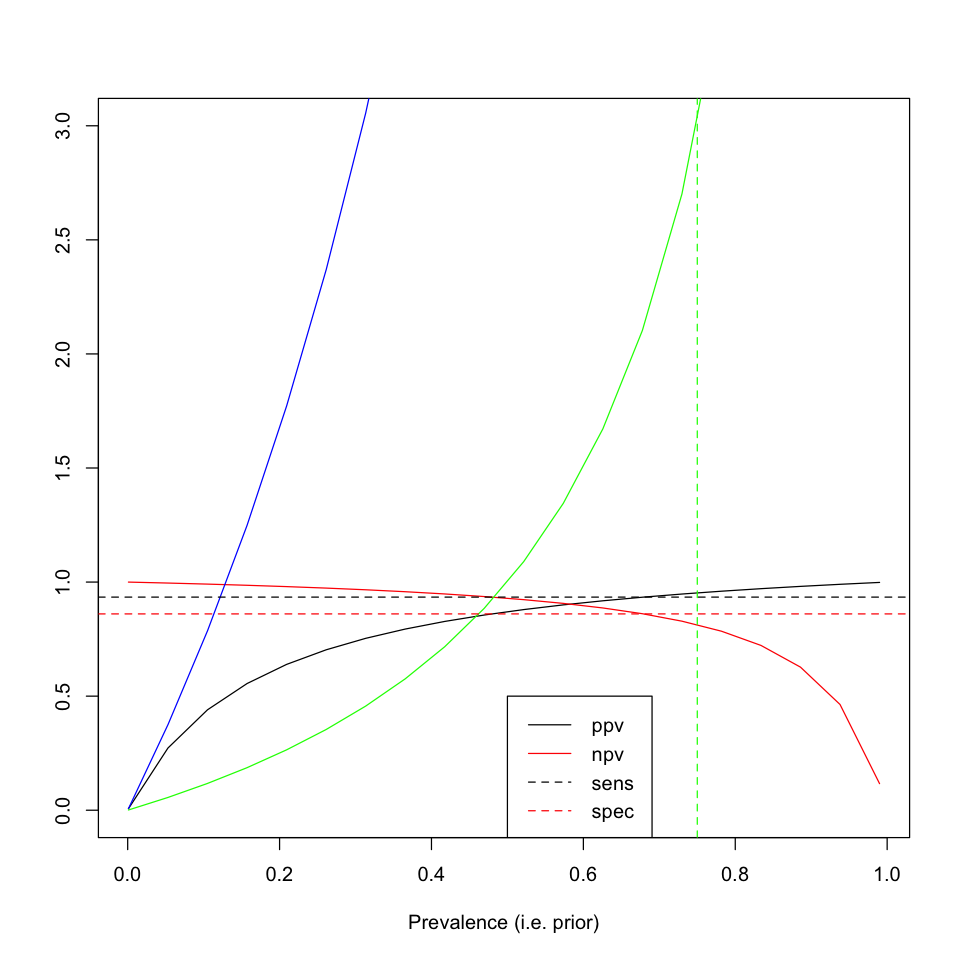

In [38]:
# https://artax.karlin.mff.cuni.cz/r-help/library/caret/html/sensitivity.html
options(repr.plot.width=8, repr.plot.height=8)
prev <- seq(0.001, .99, length = 20)
npvVals <- ppvVals <- posOdds <- posOddsn <- priorOdds <- prev * NA
for(i in seq(along = prev))
  {
    ppvVals[i] <- posPredValue(pred, truth, prevalence = prev[i])
    npvVals[i] <- negPredValue(pred, truth, prevalence = prev[i])
    posOdds[i] <- ppvVals[i] / (1 - ppvVals[i])
    posOddsn[i] <- npvVals[i] / (1 - npvVals[i])
    priorOdds[i] <- prev[i] / (1 - prev[i])
  }

plot(prev, ppvVals,
     ylim = c(0, 3),
     type = "l",
     ylab = "",
     xlab = "Prevalence (i.e. prior)")
points(prev, npvVals, type = "l", col = "red")
points(prev, posOdds, type = "l", col = "blue")
#points(prev, posOddsn, type = "l", col = "blue")
points(prev, priorOdds, type = "l", col = "green")
#points(prev, 1 / priorOdds, type = "l", col = "green")
points(prev, posOdds / priorOdds, type = "l", col = "pink")
abline(h=sensitivity(pred, truth), lty = 2)
abline(h=specificity(pred, truth), lty = 2, col = "red")
abline(v=0.75, lty = 2, col="green")
legend(.5, .5,
       c("ppv", "npv", "sens", "spec"),
       col = c("black", "red", "black", "red"),
       lty = c(1, 1, 2, 2))

Although the likelyhood ratio is constant. It is clear that the prior and posterior odds vary with prevalence. Thus if prevalence is very small, the PPV and thus the odds are small. This means that positive results are less reliable at low prevalence than at high prevalence. The contrary happens to the negative rates.

Please have a look to http://www.nature.com/news/no-publication-without-confirmation-1.21509

## power of an experiment

http://www.sciencedirect.com/science/book/9780121790608


In [16]:
library(pwr) # follows Cohen's book

### directionality

If a research seek to reject the true null hypothesis by comparing A and B values (that could be the mean of 2 populations) if rejection is expected when A and B differ, then the test has no direction (two-tailed). To the contrary, if the true null hypothesis could be rejected when A is larger than B, then the test has a direction (one-tailed).

### significance level, $\alpha$

The significance level is the rate at which the true null hypthesis may be rejected. A researcher claims that the results from his sample are significant *if* the probability to find such results if the true null hypothesis is below $\alpha$.

$\alpha$ is also known as type-I error.

### power of a statistical test, $\beta$

"The power of a statistical test of a null hypotheis is the probability that it will lead to the rejection of the null hypothesis, i.e., the probability that it will result in the conclusion that the phenomenon exists" [Cohen]

It illustrates the fact that even if an effect exists in the population (the total of the individuals) it is not obvious that it will be represented in a sample (of the population).

For example, if the power of a test is low and no effect is found, the result should be considered with care. It is analogous to the conclusion that no substance is present because no signal is observed. A chemist will ask about the limit of detection of the equipment before concluding that the substance is not present.

Thus, the power depends on three parameters, the significance, the reliability of the sample result (sample size) and the effect size, which is the degree to which the phenomenon exists (think of the prevalence in our previous examples)

 - The reliability of the sample result is often obtained as the standard deviation of the sample (the subset of the population). 
 - The significance level is $\alpha$ and is chosen by the user as an adjustable parameter.
 - The effect size is often unknown and difficult to estimate. As its name indicate it has to do with the size of the effect that should be observed. Strong effects are easily detected, while slight ones are mucho more difficult to observe with certainty.

### flip a coin -  example

https://www.stat.berkeley.edu/~s133/Random1.html

Let's assume that we want to determine if a coin is fair or not. Therefore we can make an experiment that consists in flipping the coin a hundred time and counting the number of heads and the number of tails.

Clearly we expect both numbers to be similar. If too many tail are found we might believe that the coin is unfair. One important question is to determine this value, i.e., the acceptable difference in head or tail due to random flipping and a skewed distribution due to a manipulated coin.

Let's flip a coin hundred times and see the distribution we obtain:

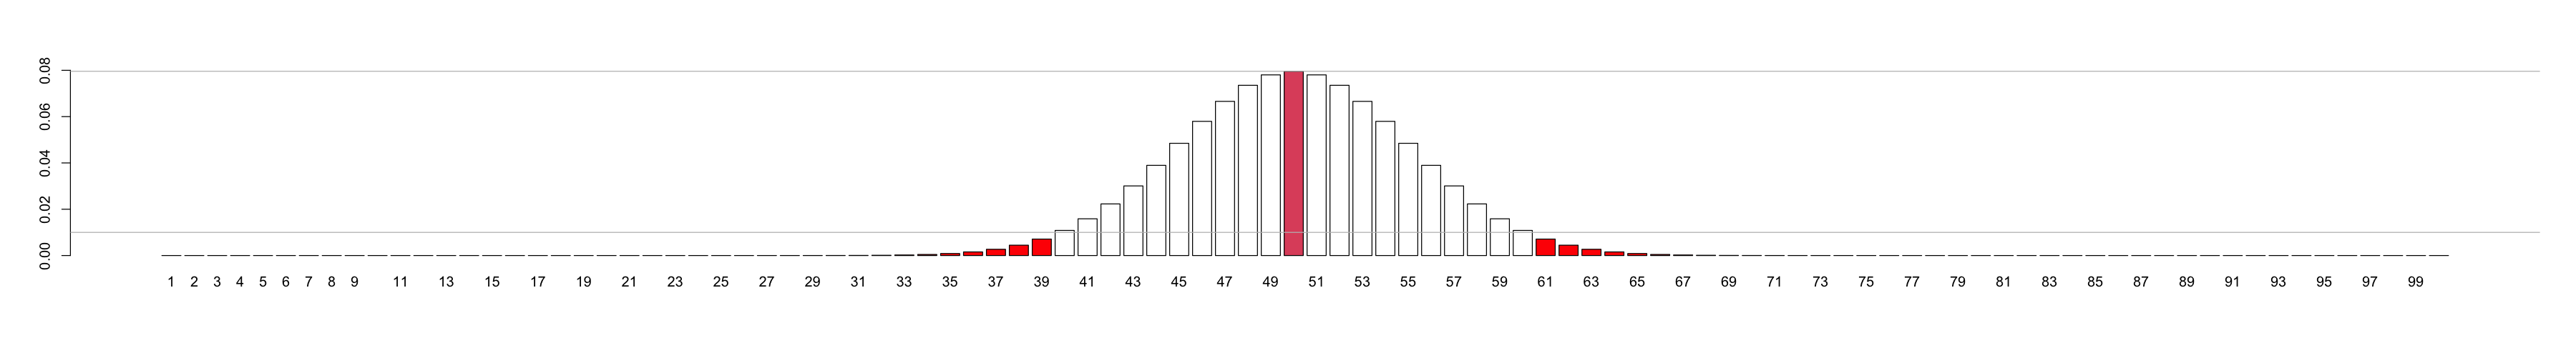

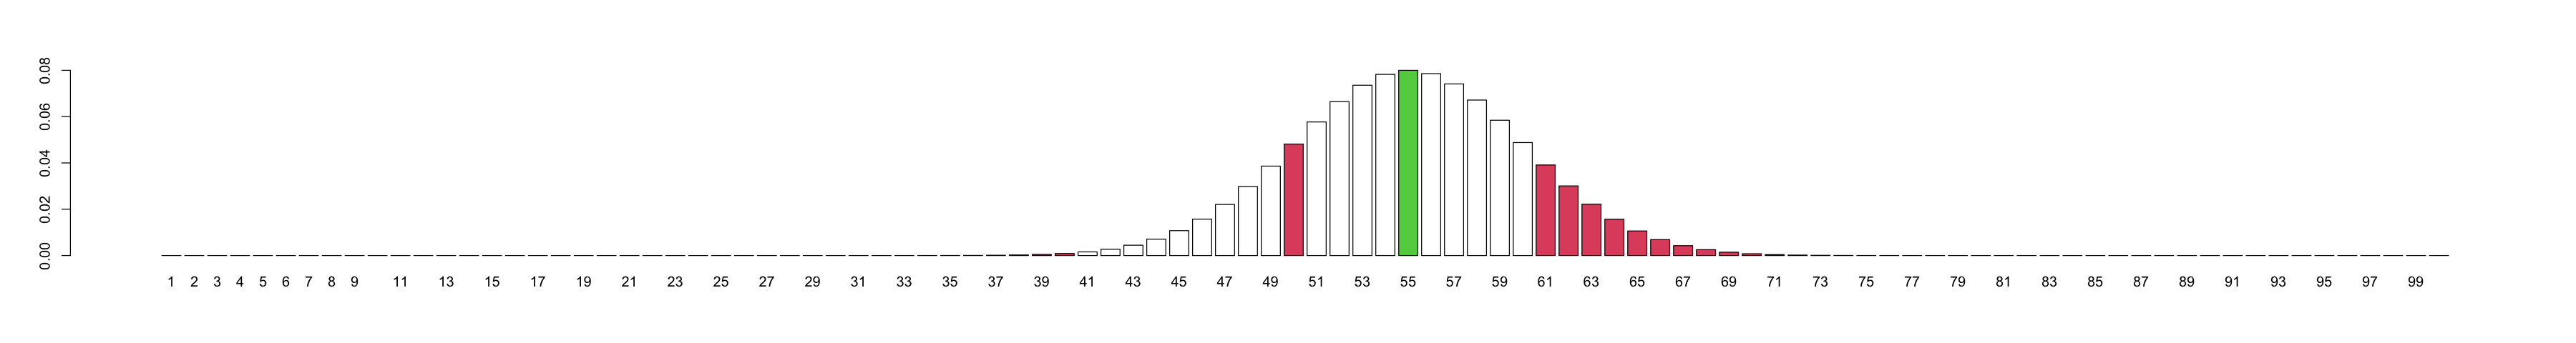

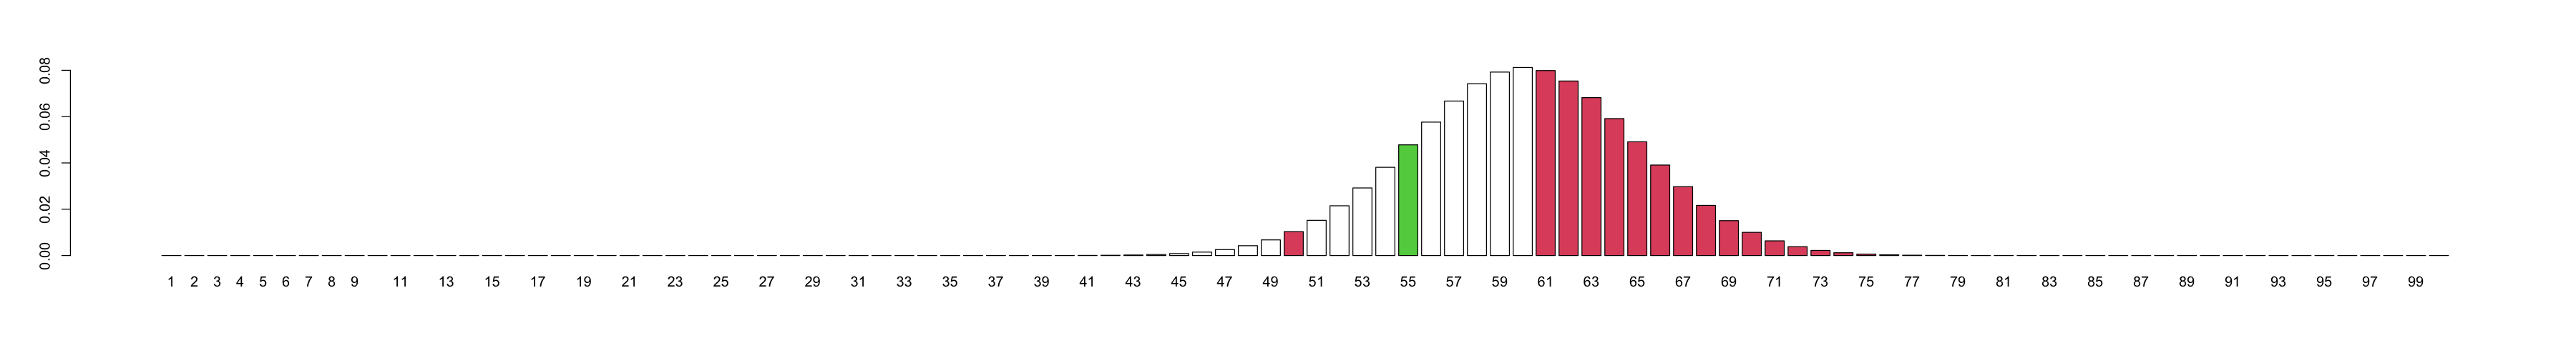

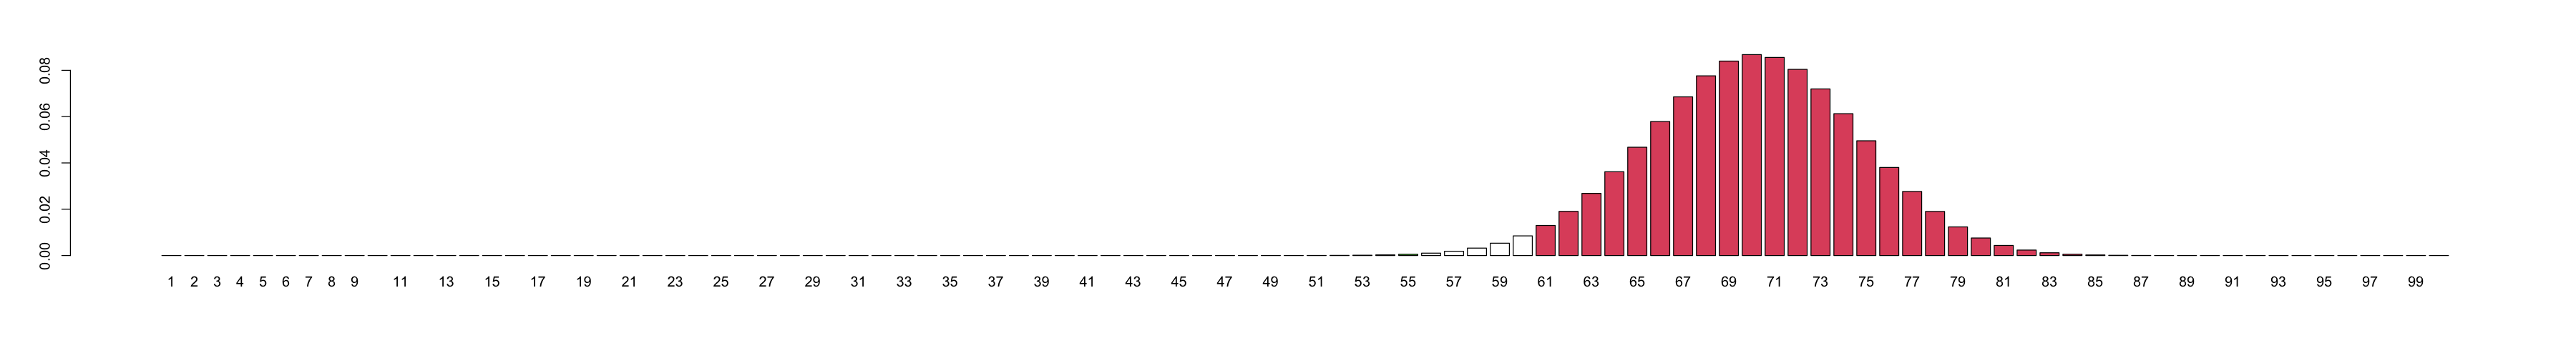

In [119]:
options(repr.plot.width=30, repr.plot.height=4) # change these setting to plot larger figures
d1 <- dbinom(1:100,100,.5)
COLOR <- c("white", "red")[(d1 < 0.01) + 1]
COLOR[50] = 2
barplot(d1,names.arg=1:100,ylim=c(0,0.08), col = COLOR)
abline(h = mean(d1), col = 'gray')
abline(h = max(d1), col = 'gray')
 
d2 <- dbinom(1:100,100,.55)
COLOR <- c(rep(2,40), rep(0,20) ,rep(2,40))
COLOR[50] = 2
COLOR[55] = 3
barplot(d2,names.arg=1:100,ylim=c(0,0.08), col = COLOR)

d3 <- dbinom(1:100,100,.6)
COLOR <- c(rep(2,40), rep(0,20) ,rep(2,40))
COLOR[50] = 2
COLOR[55] = 3
barplot(d3,names.arg=1:100,ylim=c(0,0.08), col = COLOR)

d4 <- dbinom(1:100,100,.7)
COLOR <- c(rep(2,40), rep(0,20) ,rep(2,40))
COLOR[50] = 2
COLOR[55] = 3
barplot(d4,names.arg=1:100,ylim=c(0,0.08), col = COLOR)

In [177]:
# 95% level of confidence
qbinom(.025,100,.5)
qbinom(.975,100,.5)
# 99% level of confidence
qbinom(.005,100,.5)
qbinom(.995,100,.5)

[1] 40

[1] 60

[1] 37

[1] 63

In [187]:
qbinom(.025,1000,.5)
qbinom(.975,1000,.5)

[1] 469

[1] 531

So we would accept the null hypothesis if results **fall** between 40 and 60. And we would be wrong in 5% of the time (note that it is a two-tailed test, so 5% means 2.5% on each side)

In [200]:
pbinom(40, 100, 0.5)
pbinom(40, 100, 0.5)

[1] 0.02844397

[1] 0.02844397

In [194]:
prob <- 0.7
size <- 1000
lowerTail <- pbinom(469, size, prob)
upperTail <- 1 - pbinom(531, size, prob)
cat("power", (lowerTail + upperTail), "\n")

prob <- 0.55
size <- 100
lowerTail <- pbinom(37, size, prob)
upperTail <- 1 - pbinom(63, size, prob)
cat("power", (lowerTail + upperTail))

power 1 
power 0.04312224

We simulate data and check that they behave as expected:

In [149]:
rr = rbinom(1000,100,.5);sum(rr<40|rr>60)/1000

[1] 0.043

which is very close to what we obtain using the ```pbinom()``` function.

Now, what happens if indeed the coin is not fair, i.e., one side is favoured? In this case the data would be others, but our hypothesis still would be the same, i.e., that the coin is fair. In that case we would use the same interval in order to accept or reject the null hypothesis. 

We can simulate the data that we would obtain if the coin is not fair, apply our statistical test and see what happens

In [196]:
rr = rbinom(1000,100,.55);sum(rr<40|rr>60)/1000

[1] 0.13

In [166]:
rr = rbinom(1000,100,.6);sum(rr<40|rr>60)/1000

[1] 0.457

In [168]:
rr = rbinom(1000,100,.6);sum(rr<40|rr>60)/1000

[1] 0.976

Only in about 13% of the case we would reject the null hypothesis and declare the coin unfair... <mark>it means that in the rest of the time (about 87%) we will conclude that the coin is indeed fair.</mark>

This is a very strong conclusion. It means that with this data (a 100 coin flips) we would wrongly conclude that the coin is unfair in 5% of the case if it is indeed fair and only in 13% of the cases our data would allow us to conclude that it is unfair when it is unfair by ES(effect size)=5% (|50%-5%|). 

I we repeat the same game but this time we toss the coin 500 times.

In [87]:
alpha <- .01
upper <- qbinom(1-alpha/2,500,.5)
lower <- qbinom(alpha/2,500,.5)
upper 
lower

[1] 279

[1] 221

In [101]:
rr = rbinom(1000,500,.55);sum(rr<lower|rr>upper)/1000

[1] 0.331

It means that we are now able to detect an unfair coin (ES=5%) with a much higher rate (about 40%).

We can now design a function that will allows us to estimate the power as a function of the number of tosses:

In [1056]:
coin.power <- function(ntoss=100,nsim=1000,prob=.5){
     lower <- qbinom(.025,ntoss,.5)
     upper <- qbinom(.975,ntoss,.5)
     rr <- rbinom(nsim,ntoss,prob)
     sum(rr < lower | rr > upper) / nsim
 }

1000 
0.883

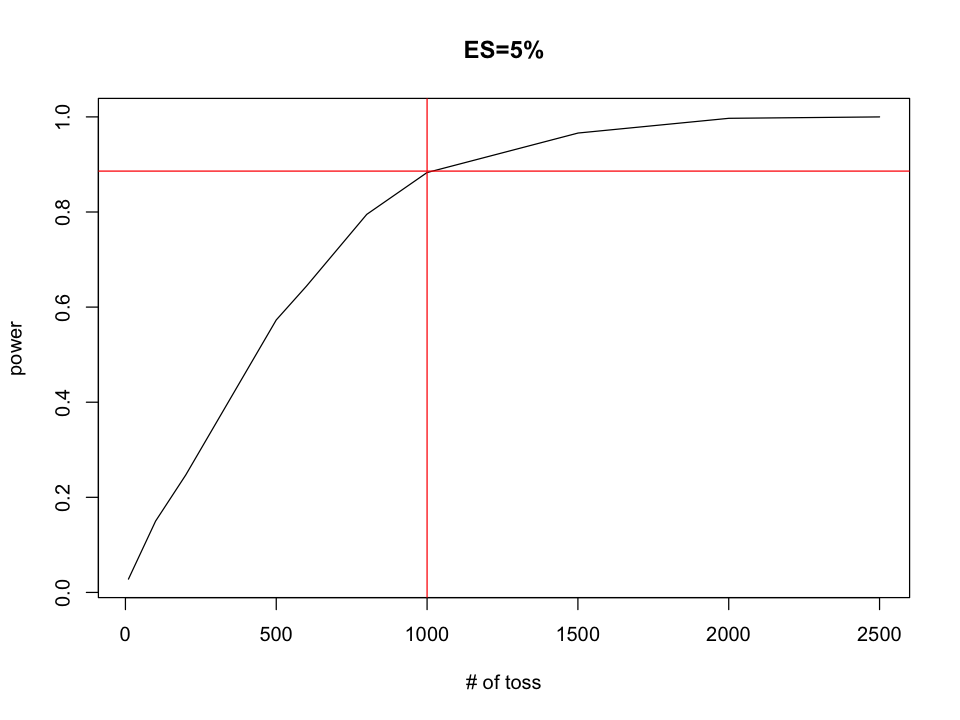

In [1057]:
options(repr.plot.width=8, repr.plot.height=6)
ntosses <- c(10,100,200,500,600,800,1000,1500,2000,2500)
res <- sapply(ntosses,coin.power,prob=.55)
names(res) <- ntosses
plot( ntosses, res , type="l", main="ES=5%",xlab="# of toss", ylab="power")
abline(v=1000, col="red")
abline(h=.886, col="red")
res[ntosses == 1000]

A researcher that would start an experiment using 1000 tosses will have a probability of finding the correct conlusion of about 90%.

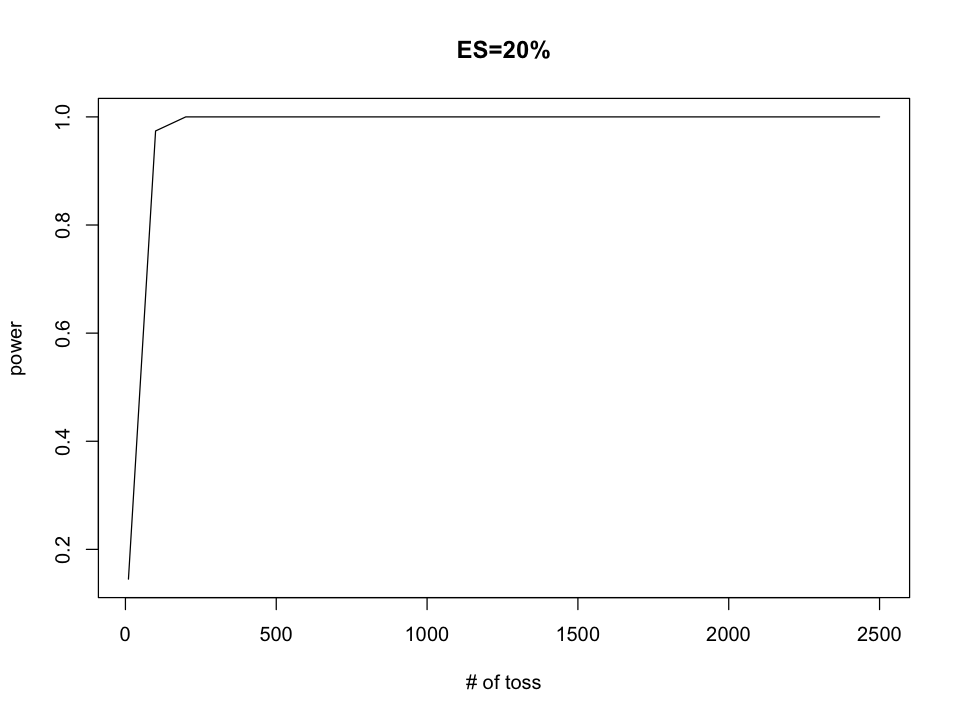

In [1058]:
options(repr.plot.width=8, repr.plot.height=6)
res = sapply(ntosses,coin.power,prob=.70)
names(res) = ntosses
plot( ntosses, res , type="l", main="ES=20%",xlab="# of toss", ylab="power")

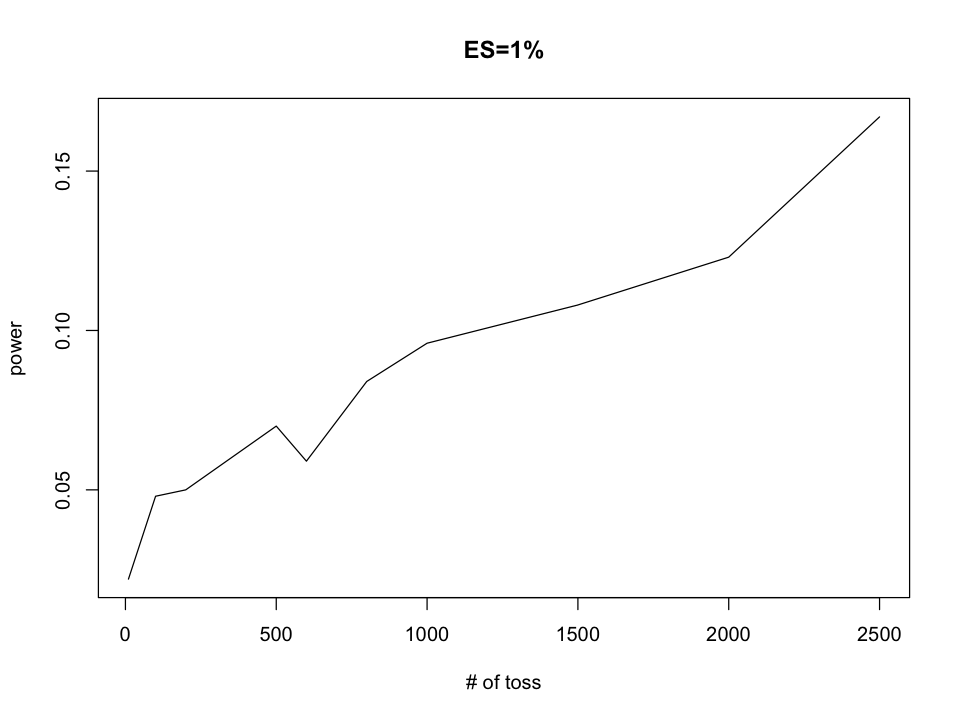

In [1059]:
options(repr.plot.width=8, repr.plot.height=6)
res = sapply(ntosses,coin.power,prob=.51)
names(res) = ntosses
plot( ntosses, res , type="l", main="ES=1%",xlab="# of toss", ylab="power")

Clearly an effect of 1% is too small to be detected event by tossing the coin a thousand times. If a researcher would run this experiment he would conclude that the coin is fair with a probability of 85%, which we know is not true. 

**Thus the researcher has a 85% probability of finding drawing the wrong conclusions. It is important to note that even if several independant research groups would repeat this experiment the probability to find the correct conclusion is very small, less than 40%.**

In [1060]:
0.85^3

[1] 0.614125

To best illustrate the relation between the statistical power of a test and the sample size, the following figure show how $\beta$ increases with a sample size of 1000.

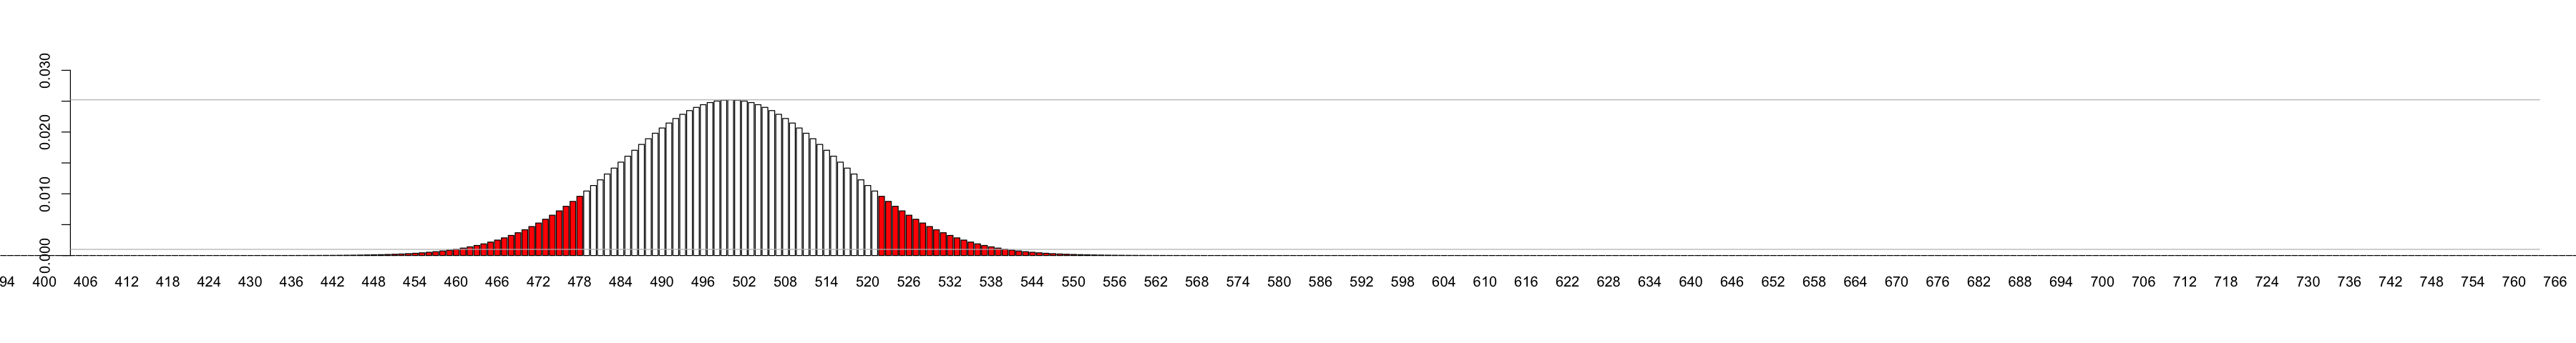

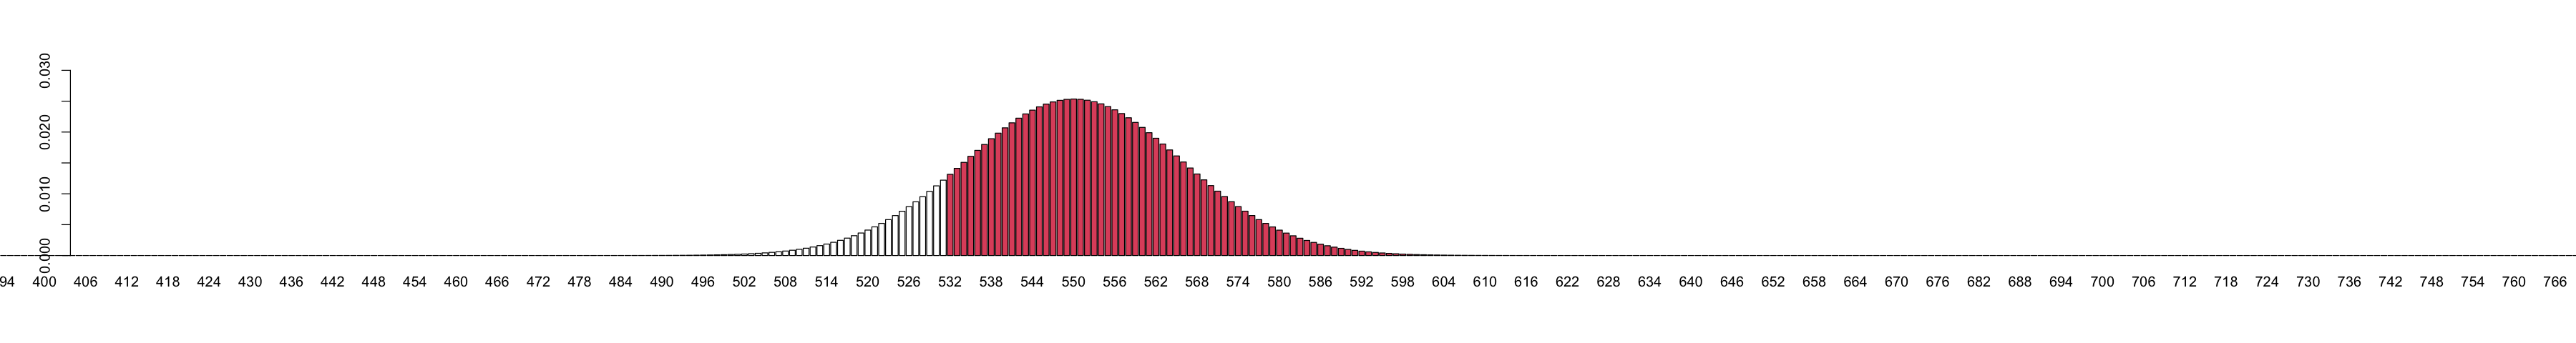

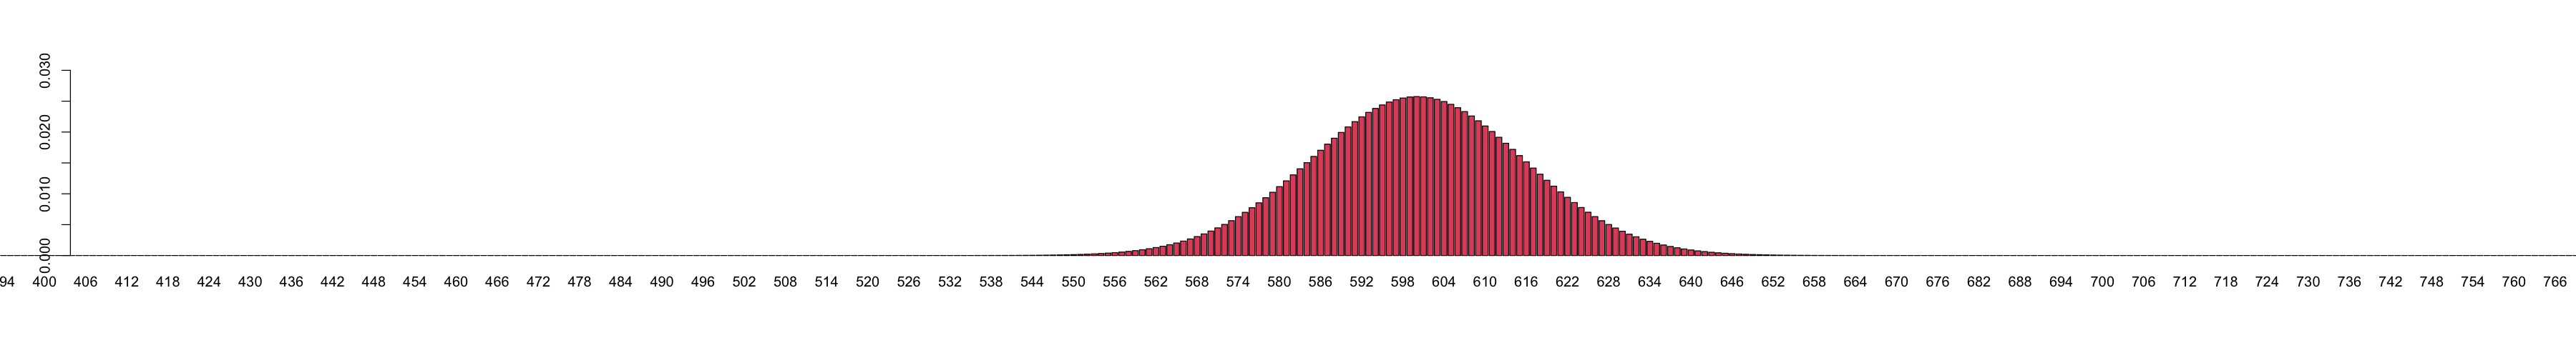

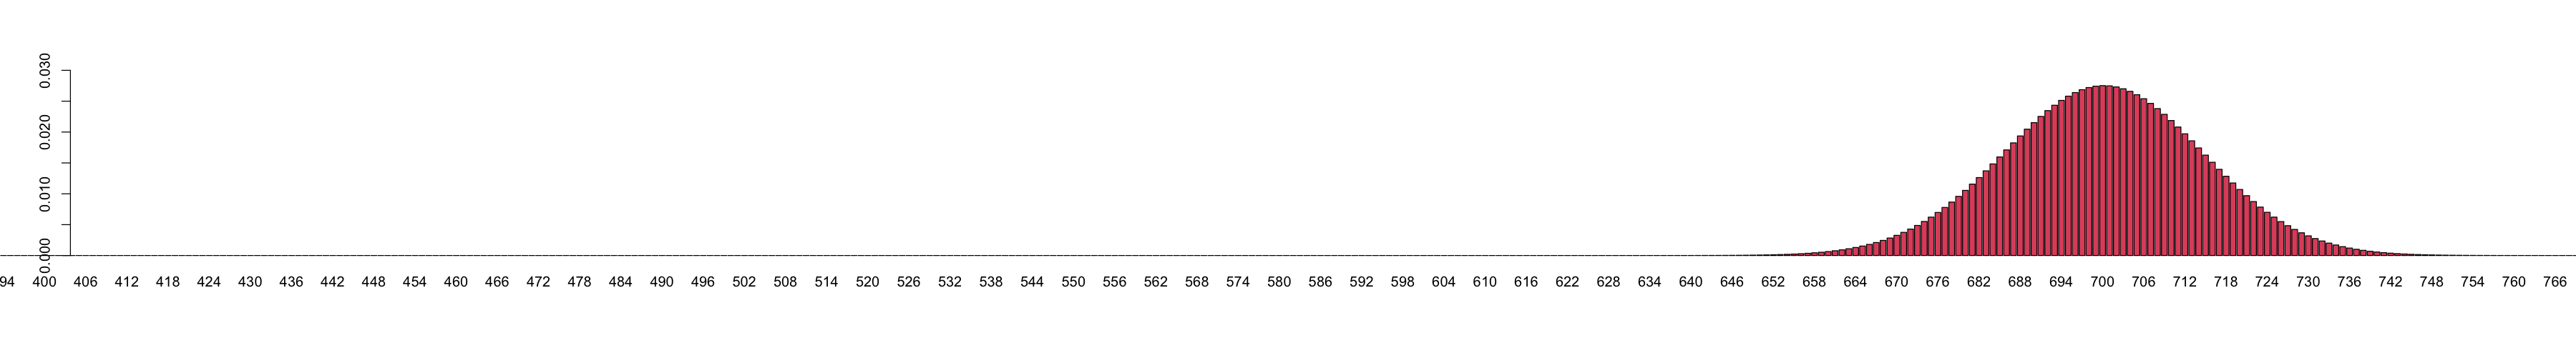

In [1050]:
options(repr.plot.width=30, repr.plot.height=4) # change these setting to plot larger figures
d1 <- dbinom(1:1000,1000,.5)
COLOR <- c("white", "red")[(d1 < 0.01) + 1]
COLOR[50] = 2
barplot(d1,names.arg=1:1000,ylim=c(0,0.03), col = COLOR, xlim = c(500, 900))
abline(h = mean(d1), col = 'gray')
abline(h = max(d1), col = 'gray')
 
d2 <- dbinom(1:1000,1000,.55)
COLOR <- c(rep(2,469), rep(0,62) ,rep(2,469))
COLOR[50] = 2
COLOR[55] = 3
barplot(d2,names.arg=1:1000,ylim=c(0,0.03), col = COLOR, xlim = c(500, 900))

d2 <- dbinom(1:1000,1000,.6)
COLOR <- c(rep(2,469), rep(0,62) ,rep(2,469))
COLOR[50] = 2
COLOR[55] = 3
barplot(d2,names.arg=1:1000,ylim=c(0,0.03), col = COLOR, xlim = c(500, 900))

d2 <- dbinom(1:1000,1000,.7)
COLOR <- c(rep(2,469), rep(0,62) ,rep(2,469))
COLOR[50] = 2
COLOR[55] = 3
barplot(d2,names.arg=1:1000,ylim=c(0,0.03), col = COLOR, xlim = c(500, 900))

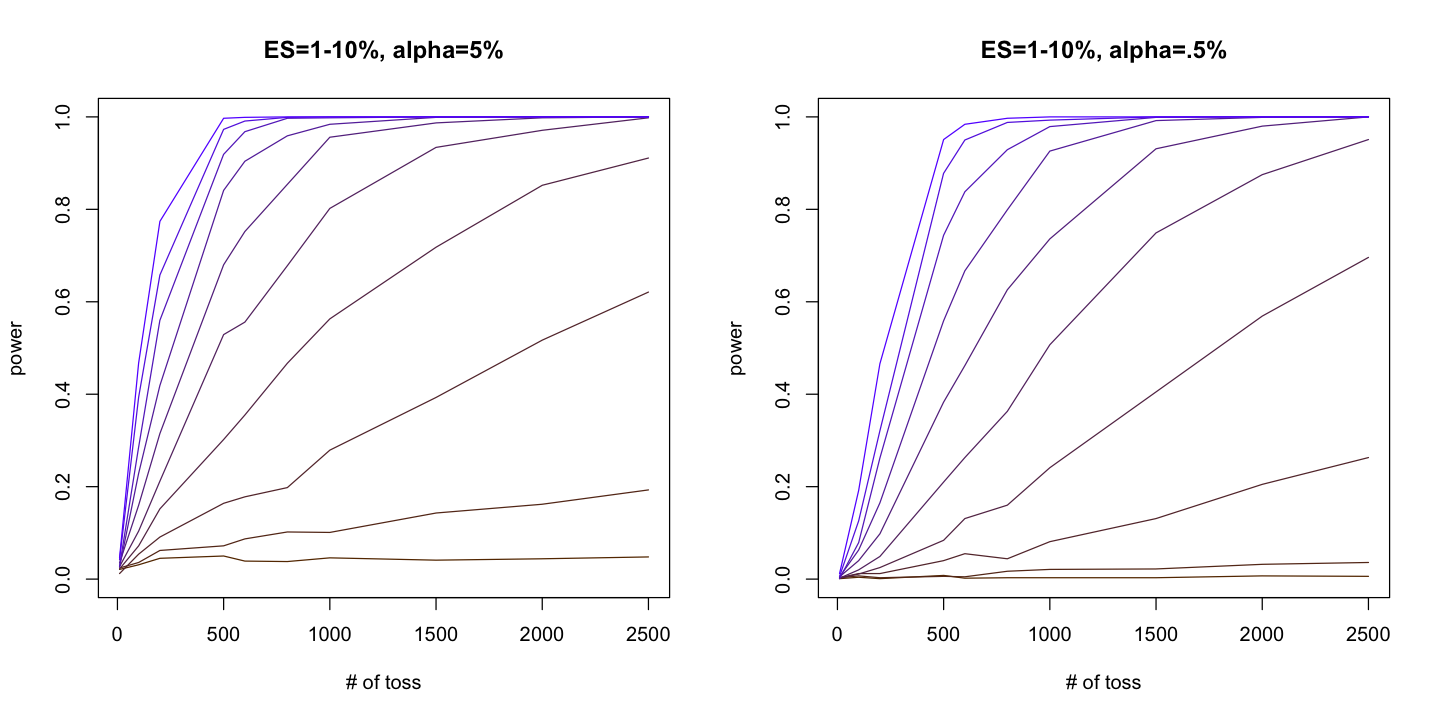

In [1052]:
library(plotrix)

coin.power <- function(ntoss=100,nsim=1000,prob=.5, alpha){
     lower <- qbinom(alpha/2,ntoss,.5)
     upper <- qbinom(1-alpha/2,ntoss,.5)
     rr <- rbinom(nsim,ntoss,prob)
     sum(rr < lower | rr > upper) / nsim
 }

ntosses <- c(10,100,200,500,600,800,1000,1500,2000,2500)

options(repr.plot.width=12, repr.plot.height=6) # change these setting to plot larger figures
par(mfrow=c(1,2))

res = sapply(ntosses,coin.power,prob=.51,alpha=.05)
names(res) = ntosses
plot( ntosses, res , type="n", main="ES=1-10%, alpha=5%",xlab="# of toss", ylab="power", ylim=c(0,1))

for (i in seq(0.5,.6,length.out=10)) {
    j = scale(i, center=0.5, scale=.1)
    lines( ntosses, sapply(ntosses,coin.power,prob=i,alpha=.05), col=color.scale(1,.4,.2,j) )
}


plot( ntosses, res , type="n", main="ES=1-10%, alpha=.5%",xlab="# of toss", ylab="power", ylim=c(0,1))

for (i in seq(0.5,.6,length.out=10)) {
    j = scale(i, center=0.5, scale=.1)
    lines( ntosses, sapply(ntosses,coin.power,prob=i,alpha=.005), col=color.scale(1,.4,.2,j) )
}


<mark>On the above figure, the effect of $\alpha$ is clearly visible. If a researcher chooses to decrease the type-I error rate ($\alpha$) in order to decrease the false negative (negative being rejecting the null hyptothesis, when the coin is indeed fair), he will also decrease the power of his experiment.</mark>

This is very similar to establishing a perfect threshold value for peak detection in a spectrum. A low threshold (large $\alpha$ value) will allow to pick the signal, but will detect many spurious signals (false negatives). A high threshold (low $\alpha$ value) will avoid detecting the noise, but if set to high will prevent us to detect the signal either.

<mark>Do not say: "the difference between the two means is not statistically significant"</mark>

<mark>Say: "the data doesn't allow us to conlude that the population means differ"</mark>

p. 16 of Cohen, J. (1977). Statistical Power Analysis for the Behavioral Sciences (Rev. ed.). New York: Academic Press, Inc.

### two samples t-test

The same approach can be used to evaluate the statistical power of a two sample t-test that is commonly used to test if the difference between the means of two populations are large compared to their standard deviations. It is important to rememeber that this test assume the normality of the distributions and that both distribution share a similar standard deviation.

In [1062]:
x = rnorm(10)
y = rnorm(10)
t.test(x,y)


	Welch Two Sample t-test

data:  x and y
t = 0.11864, df = 17.258, p-value = 0.9069
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8911715  0.9974975
sample estimates:
mean of x mean of y 
0.1869311 0.1337682 


the *null* hipothesis is that both means are equal and thus if we compare two similar distributions we expect the test to fall into the confidence internal, that is a p-value larger than 0.05. (if $\alpha$ is 0.95)

If we repeat this experiment a large number of time we can infer the shape of the probability density function.

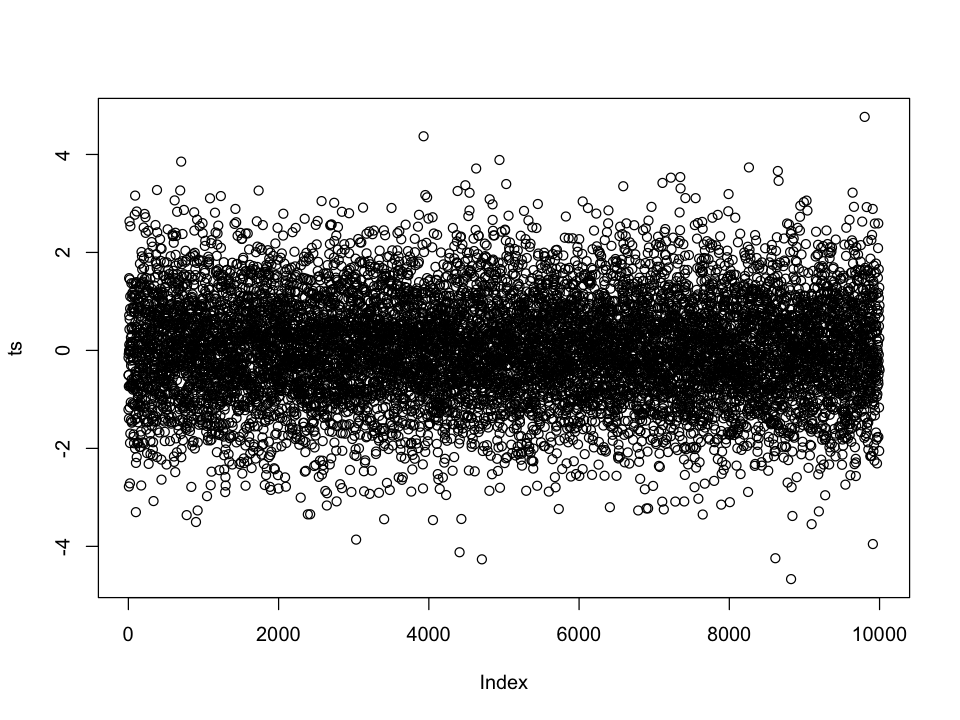

In [1066]:
ts = replicate(10000,t.test(rnorm(10),rnorm(10))$statistic)
plot(ts)

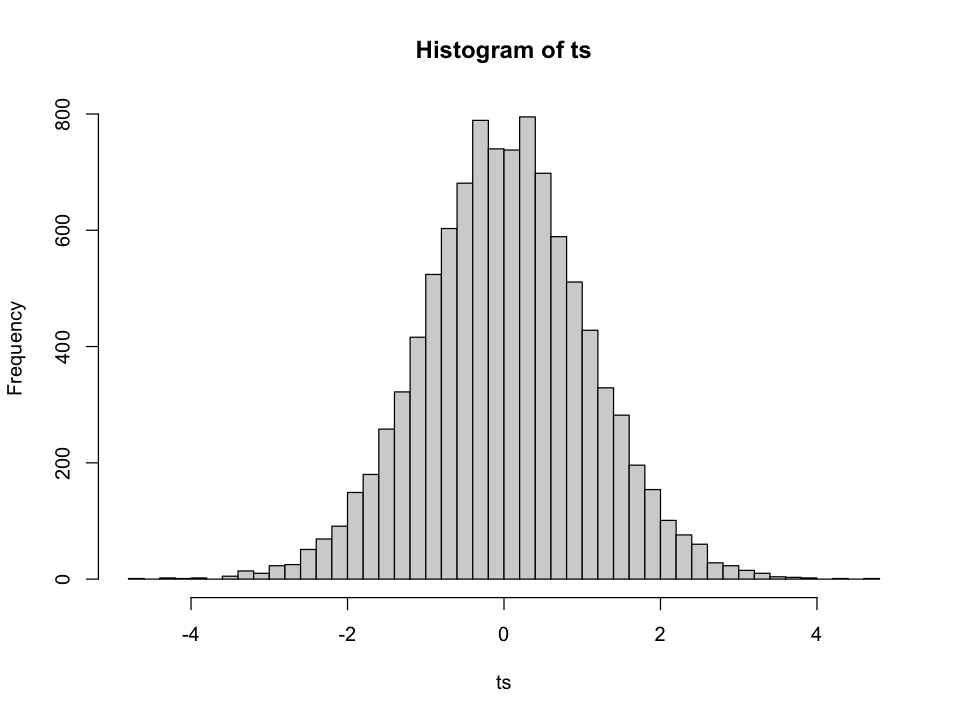

In [1067]:
hist(ts, breaks = 50)

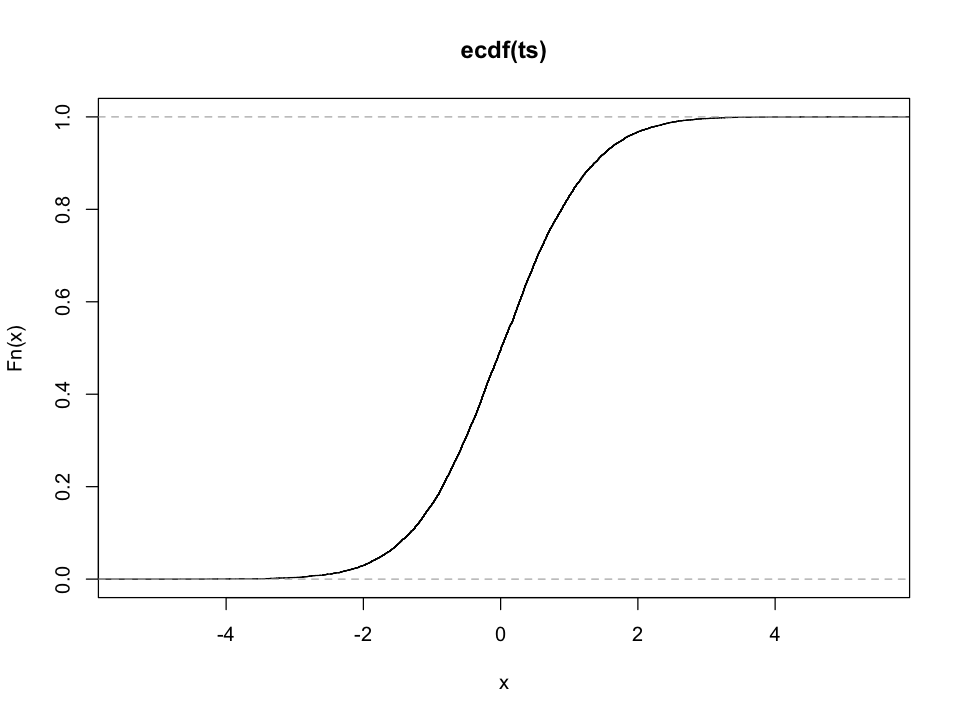

In [1081]:
cumulativeDensityFunction <- ecdf(ts)
plot(cumulativeDensityFunction)

we find the critical values by looking to the values of the cdf that gives 2.5% probability

In [1083]:
cumulativeDensityFunction(-2.08)
cumulativeDensityFunction(2.08)

[1] 0.0249

[1] 0.9717

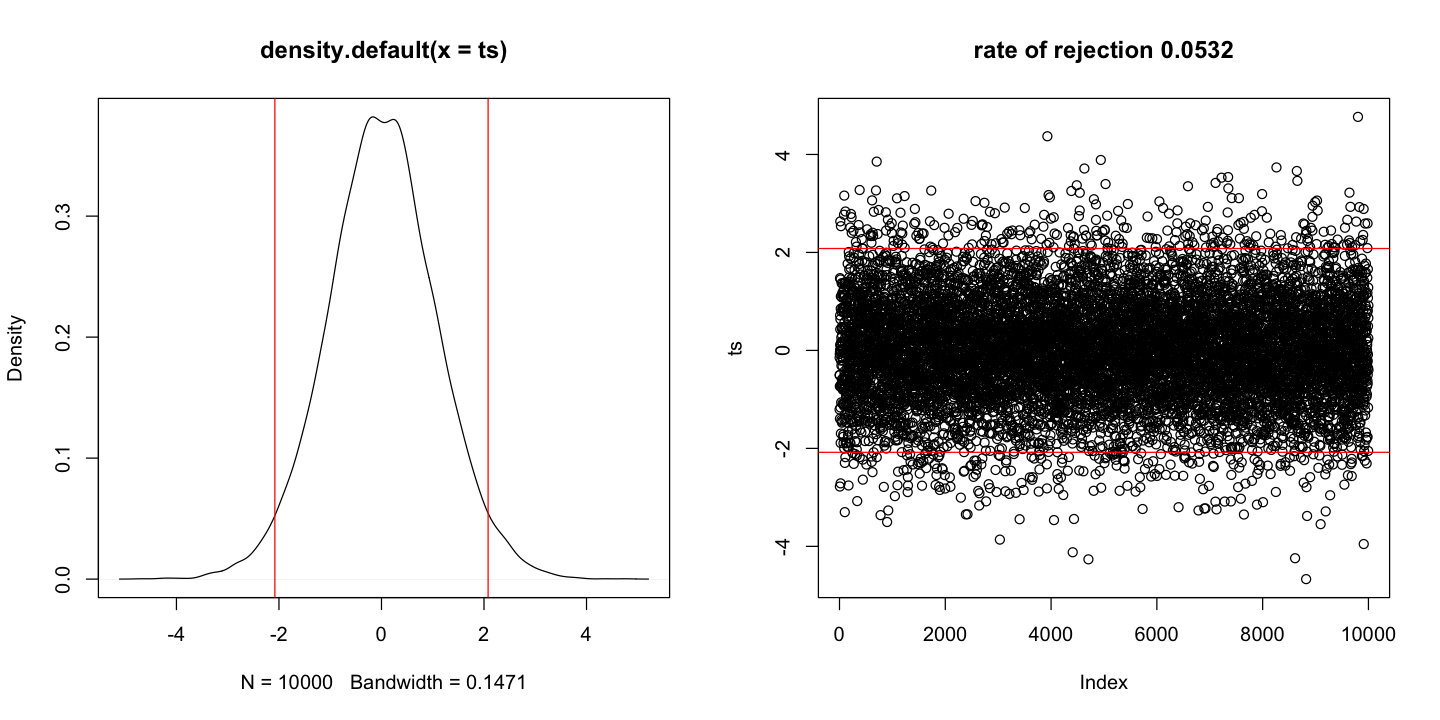

In [1095]:
options(repr.plot.width=12, repr.plot.height=6) # change these setting to plot larger figures
par(mfrow=c(1,2))
plot(density(ts))
abline(v = -2.08, col = "red")
abline(v = 2.08, col = "red")

plot(ts, main = paste("rate of rejection", sum(ts > 2.08 | ts < -2.08) / 10000))
abline(h = 2.08, col = "red")
abline(h = -2.08, col = "red")



All test values that fall outside the confidence internal (from -2.08 to 2.08) implies that the *null* hipothesis should be rejected. We can use these critical value to find out the statistical power $\beta$ of our experiment depending on the effect size.

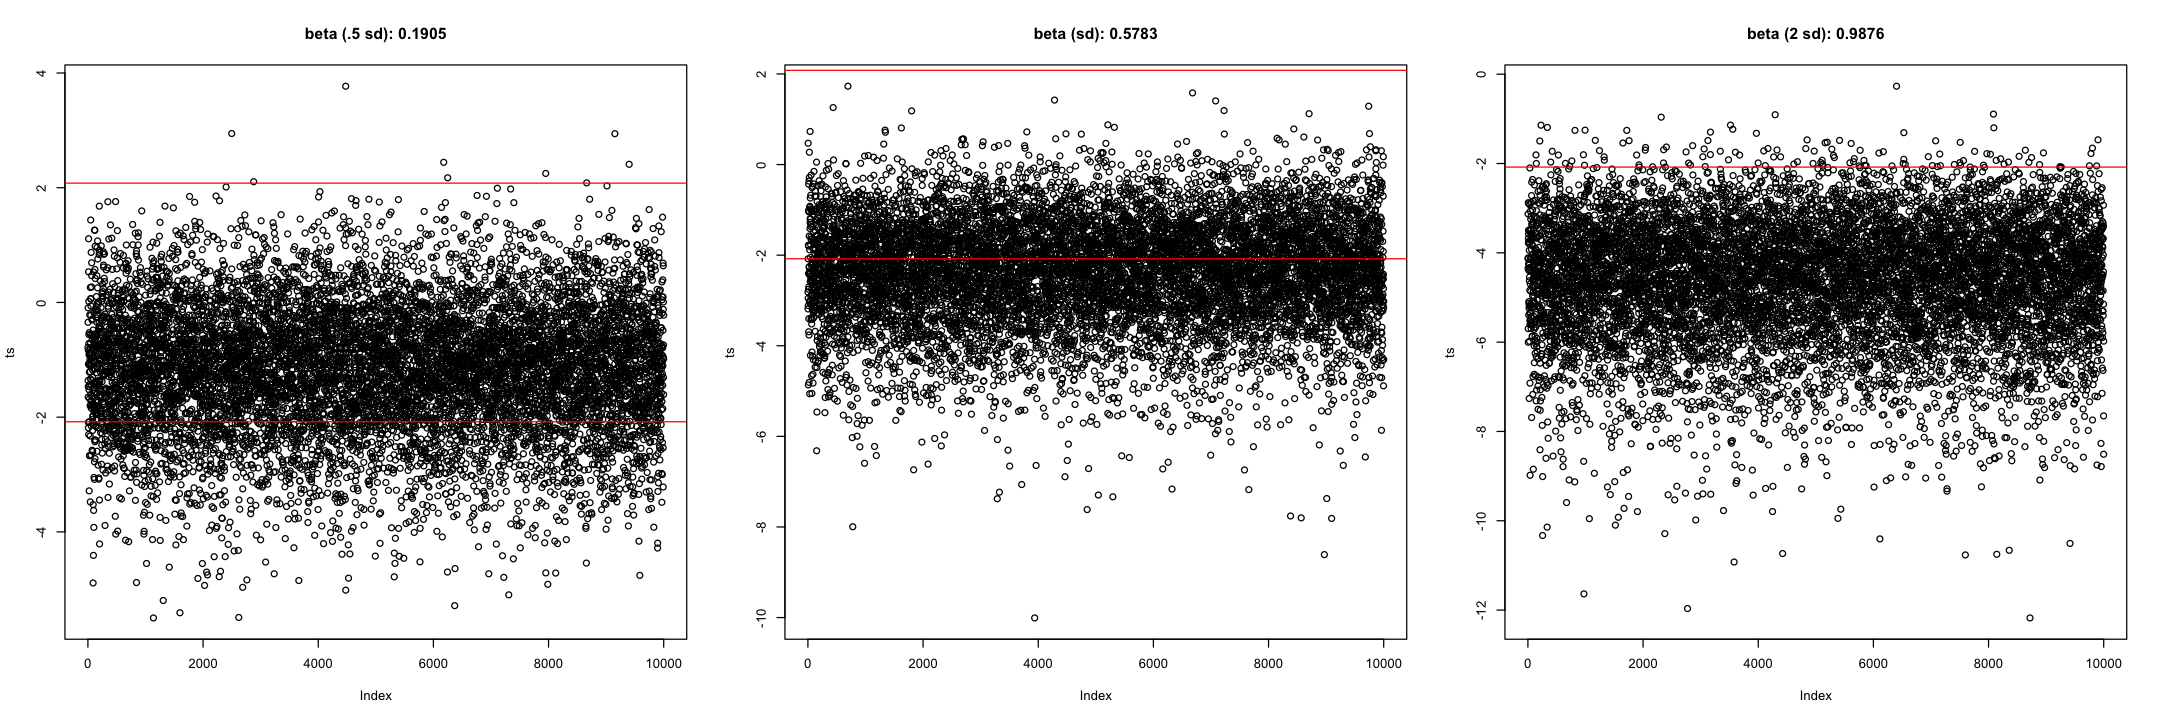

In [1101]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow=c(1,3))
ts = replicate(10000,t.test(rnorm(10, mean = 0, sd = 1),rnorm(10, mean = 0.5, sd = 1))$statistic)
plot(ts, main = paste("beta (.5 sd):", sum(ts > 2.08 | ts < -2.08) / 10000))
abline(h = 2.08, col = "red")
abline(h = -2.08, col = "red")

ts = replicate(10000,t.test(rnorm(10, mean = 0, sd = 1),rnorm(10, mean = 1, sd = 1))$statistic)
plot(ts, main = paste("beta (sd):", sum(ts > 2.08 | ts < -2.08) / 10000))
abline(h = 2.08, col = "red")
abline(h = -2.08, col = "red")

ts = replicate(10000,t.test(rnorm(10, mean = 0, sd = 1),rnorm(10, mean = 2, sd = 1))$statistic)
plot(ts, main = paste("beta (2 sd):", sum(ts > 2.08 | ts < -2.08) / 10000))
abline(h = 2.08, col = "red")
abline(h = -2.08, col = "red")

## statistical inference

Assume that the experiments consists in measuring the height of the individual of a population, we can "sample" some individual from that population.

height: 189 168 172 174 
mean 175.8 
std 9.2 


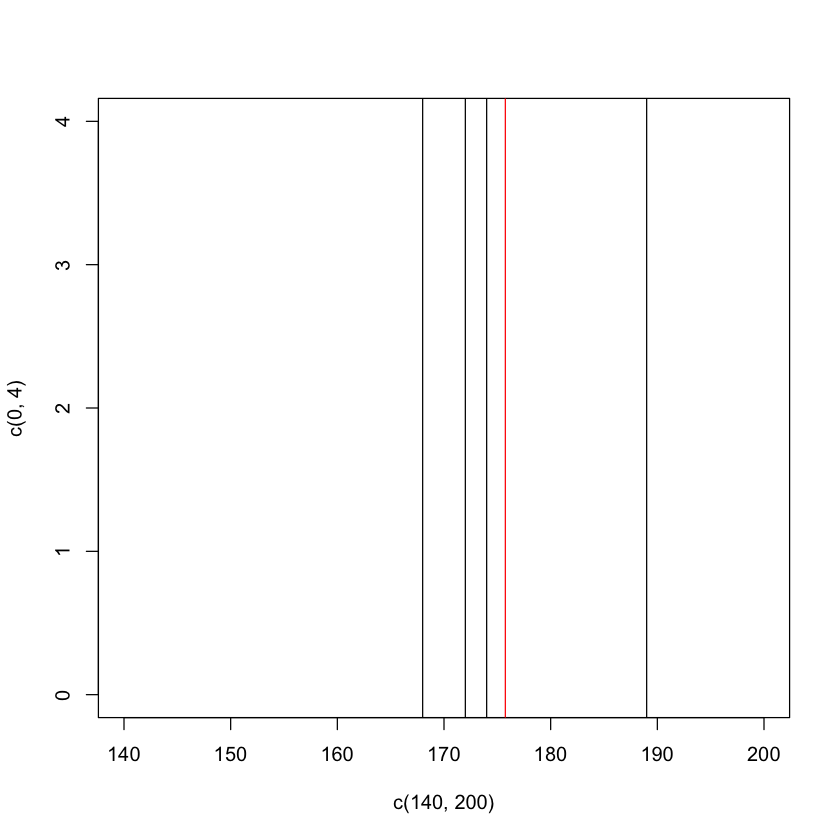

In [5]:
N <- 4
height <- round(rnorm(N, mean = 170, sd = 10), 0)
cat("height:", height, "\n")
cat("mean", round(mean(height), 1), "\n")
cat("std", round(sd(height), 1), "\n")
plot(c(140, 200), c(0, 4), type = "n")
abline(v = height)
mean <- mean(height)
abline(v = mean, col = "red")

if we repeat the same experiment we find that the result may vary.

height: 189 168 172 174 166.251 176.156 163.447 180.074 
mean 173.6 
std 8.3 


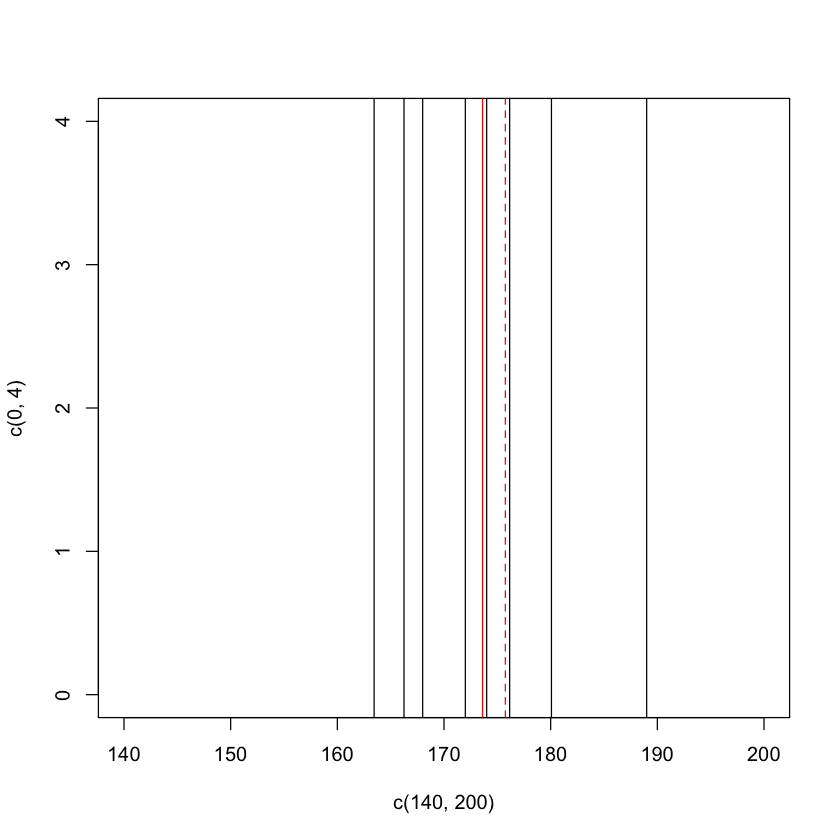

In [6]:
N <- 4
height <- c(height, round(rnorm(N, mean = 170, sd = 10), 3))
cat("height:", height, "\n")
cat("mean", round(mean(height), 1), "\n")
cat("std", round(sd(height), 1), "\n")
plot(c(140, 200), c(0, 4), type = "n")
abline(v = height)
abline(v = mean(height), col = "red")
abline(v = mean, col = "red", lty = 2)

In [232]:
ks.test(height, "pnorm")

Warning message in ks.test(height, "pnorm"):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  height
D = 1, p-value = 2.251e-07
alternative hypothesis: two-sided


In [213]:
N <- 100
height <- round(rnorm(N, mean = 170, sd = 10), 0)
cat("mean", round(mean(height), 1), "\n")
cat("std", round(sd(height), 1), "\n")

mean 170.5 
std 10.1 


In [133]:
N <- 100
height <- round(rnorm(N, mean = 170, sd = 10), 3)
cat("mean", round(mean(height), 1), "\n")
cat("std", round(sd(height), 1), "\n")

mean 170.6 
std 10.8 


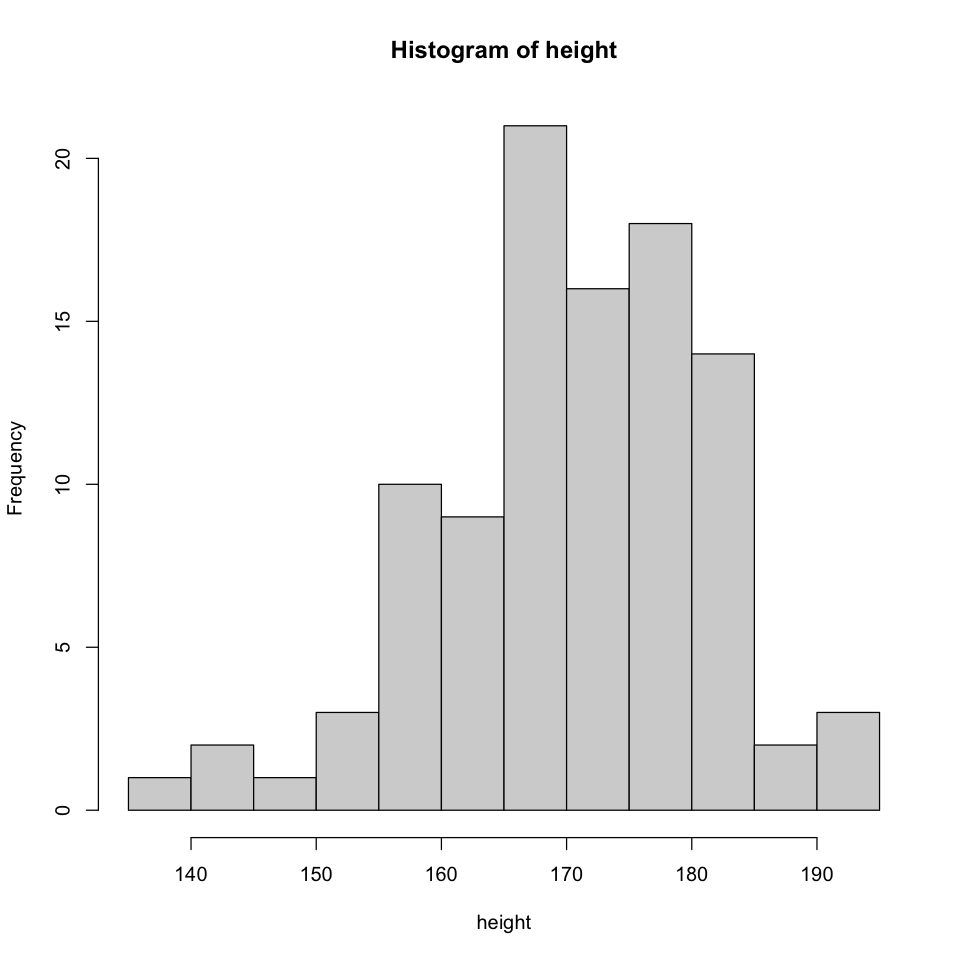

In [134]:
hist(height)

In [135]:
ks.test(height, "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  height
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


Empirical CDF 
Call: ecdf(height)
 x[1:100] = 139.35, 140.21, 144.16,  ..., 192.68,  193.2

In [78]:
N <- 1000
height <- round(rnorm(N, mean = 170, sd = 10), 0)
cat("mean", round(mean(height), 1), "\n")
cat("std", round(sd(height), 1), "\n")

mean 170.1 
std 9.9 


In [79]:
N <- 1000
height <- round(rnorm(N, mean = 170, sd = 10), 0)
cat("mean", round(mean(height), 1), "\n")
cat("std", round(sd(height), 1), "\n")

mean 169.3 
std 9.9 


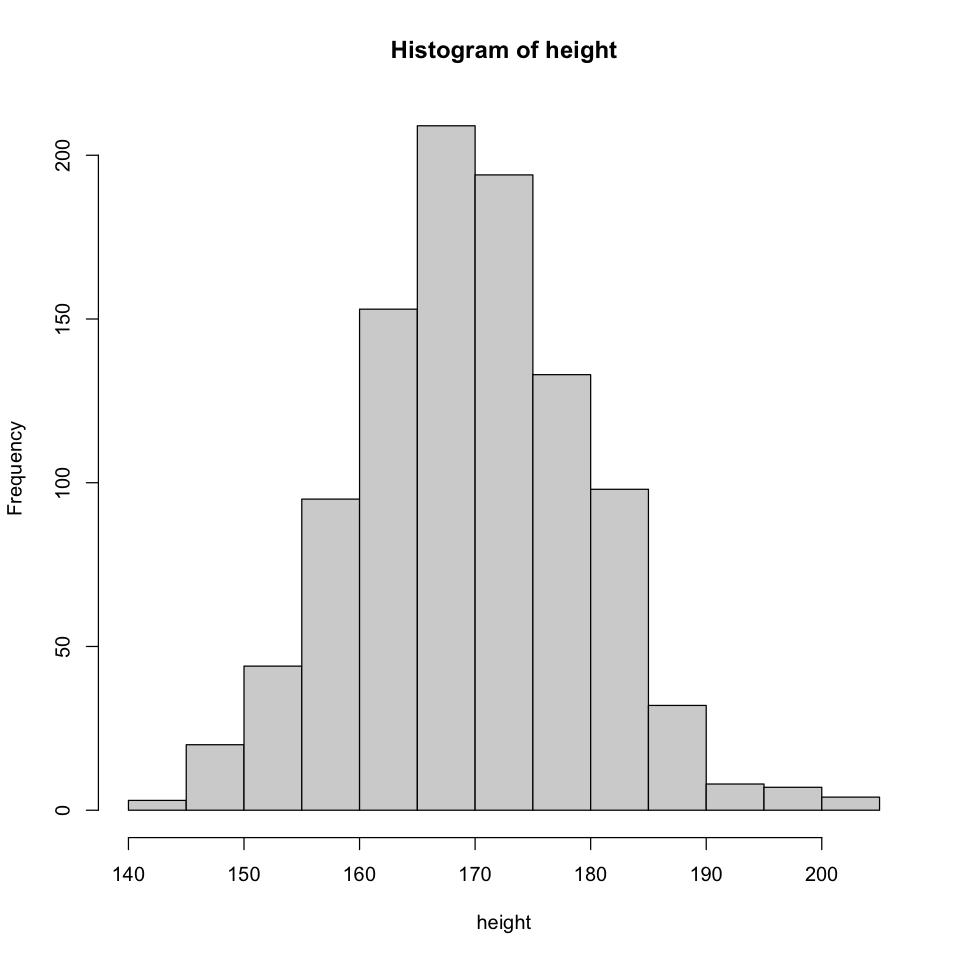

In [71]:
hist(height)

mean 169.8 
std 10.1 


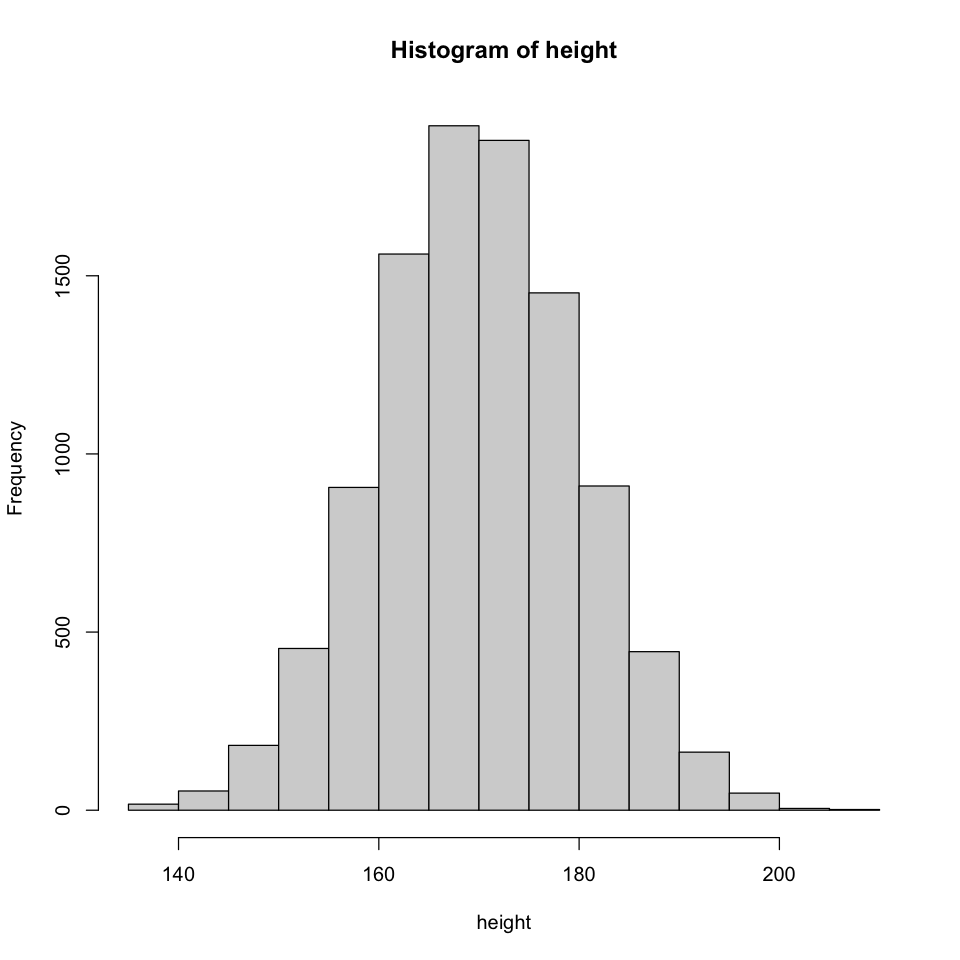

In [172]:
N <- 10000
height <- rnorm(N, mean = 170, sd = 10)
cat("mean", round(mean(height), 1), "\n")
cat("std", round(sd(height), 1), "\n")
hist(height)

In [173]:
ks.test(height, "pnorm")


	One-sample Kolmogorov-Smirnov test

data:  height
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


In [174]:
test <- ecdf(height)

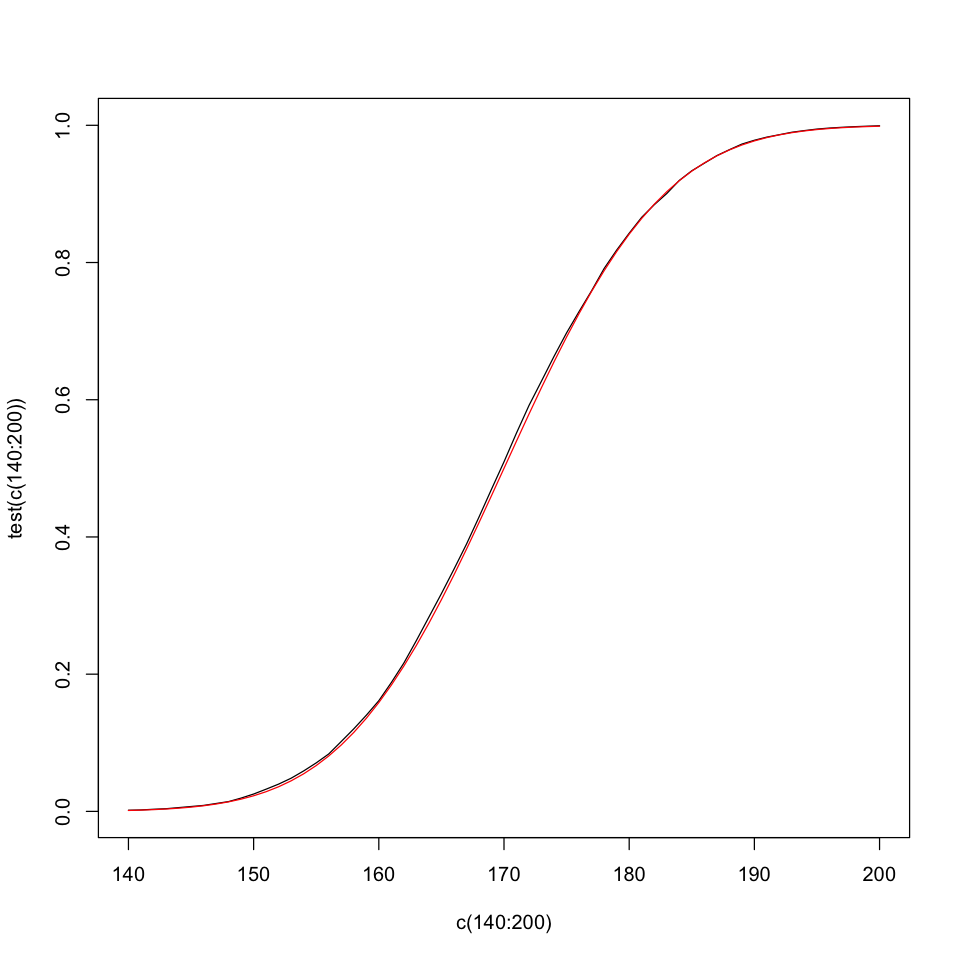

In [175]:
plot(c(140:200), test(c(140:200)), type = "l")
lines(c(140:200), pnorm(c(140:200), mean = 170, sd = 10), col = "red")


	Two-sample Kolmogorov-Smirnov test

data:  data1 and data2
D = 0.39, p-value = 4.959e-07
alternative hypothesis: two-sided


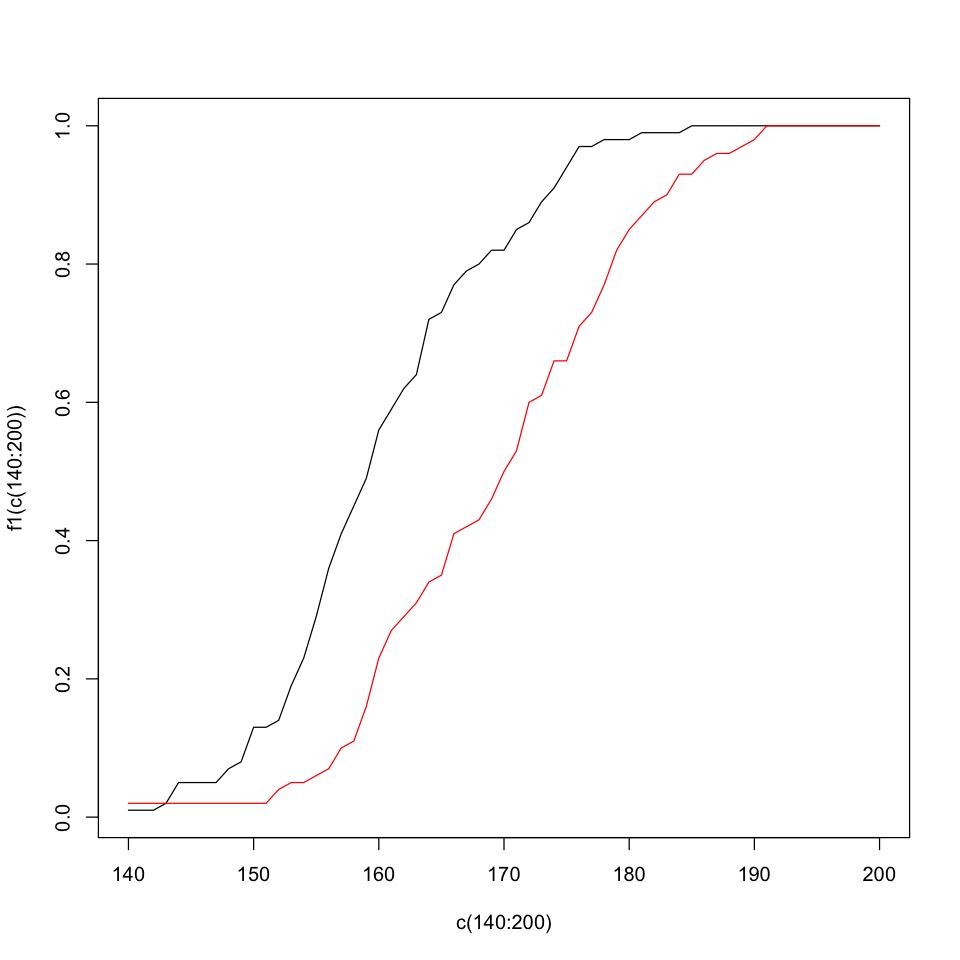

In [206]:
N <- 100
data1 <- rnorm(N, mean = 160, sd = 10)
data2 <- rnorm(N, mean = 170, sd = 10)
#data2 <- runif(c(140:200), max = 170, min = 150)
ks.test(data1, data2)
f1 <- ecdf(data1)
f2 <- ecdf(data2)
plot(c(140:200), f1(c(140:200)), type = "l")
lines(c(140:200), f2(c(140:200)), col = "red")

https://www.stat.berkeley.edu/~s133/Random2a.html

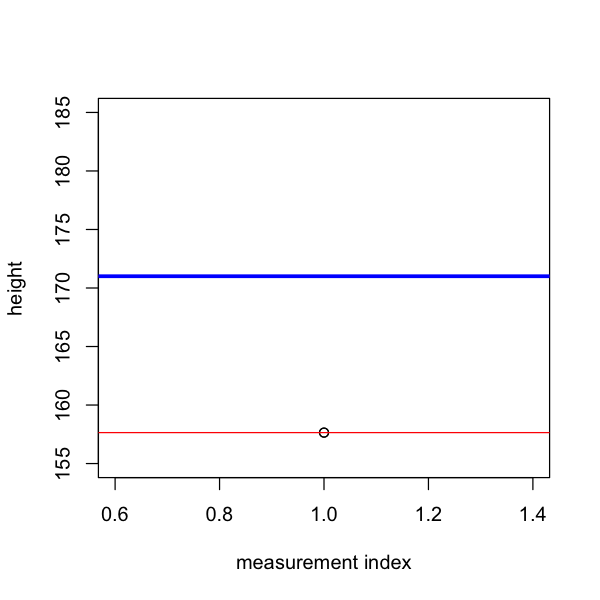

In [815]:
N <- 1
measurements <- rnorm(2:N, mean = 170, sd = 10)
for (j in 2:N){
    # png(file = paste0("normal", j, ".png"))

    plot(1, measurements[1], ylim = c(155, 185), xlim = c(1, N),
        xlab = "measurement index", ylab = "height")

    for (i in 2:j) {
        points(i, measurements[i])
        abline(h = mean(measurements[1:i]), col = "red")
    }
    
    if (j == N) {
        abline(h = mean(measurements), col = "blue", lwd = 3)
    }
    # dev.off()
}

In [368]:
N <- 100

for (j in 1:N){
    measurements <- rnorm(100, mean = 1, sd = 0.1)
    png(file = paste0("density", j, ".png"))

    plot(density(measurements), xlim = c(0.7, 1.3), ylim = c(0, 5),
        xlab = "weight", ylab = "density probability", main = "")
    abline(v = mean(measurements), col = "red")
    measurements2 <- rnorm(100, mean = 1.05, sd = 0.1)
    lines(density(measurements2), col = "red")
    abline(v = mean(measurements2), col = "red")
    t <- t.test(measurements, measurements2, var.equal = TRUE)
    title(main = paste(round(t$statistic, 3), round(t$p.value, 6)))
    dev.off()
}

        t 
-7.212472 


Two samples of the population of interests
Null hypothesis: the means of the two distributions are identical
Is smoking having an influence on the newborn weight?


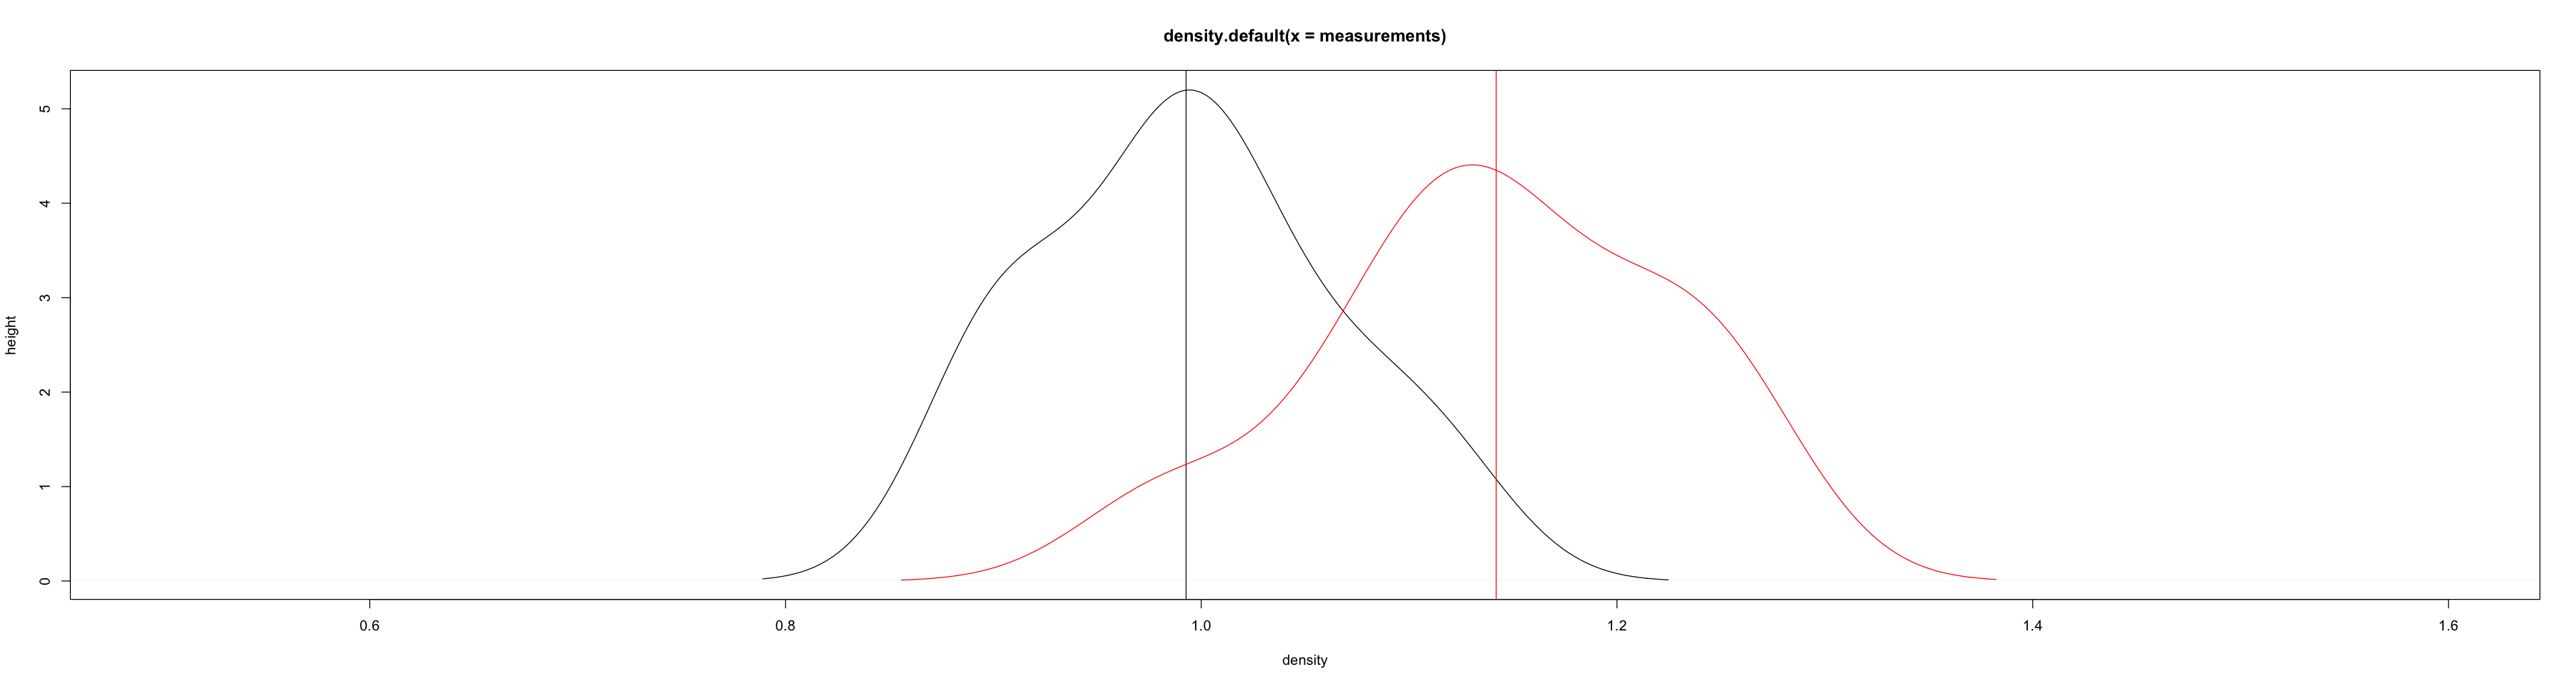

In [297]:
measurements <- rnorm(10, mean = 1, sd = 0.1)
plot(density(measurements), xlim = c(0.5, 1.6),
        xlab = "weight", ylab = "probability density")
    abline(v = mean(measurements))
measurements <- rnorm(10, mean = 1.1, sd = 0.1)
lines(density(measurements), col = "red")
    abline(v = mean(measurements), col = "red")

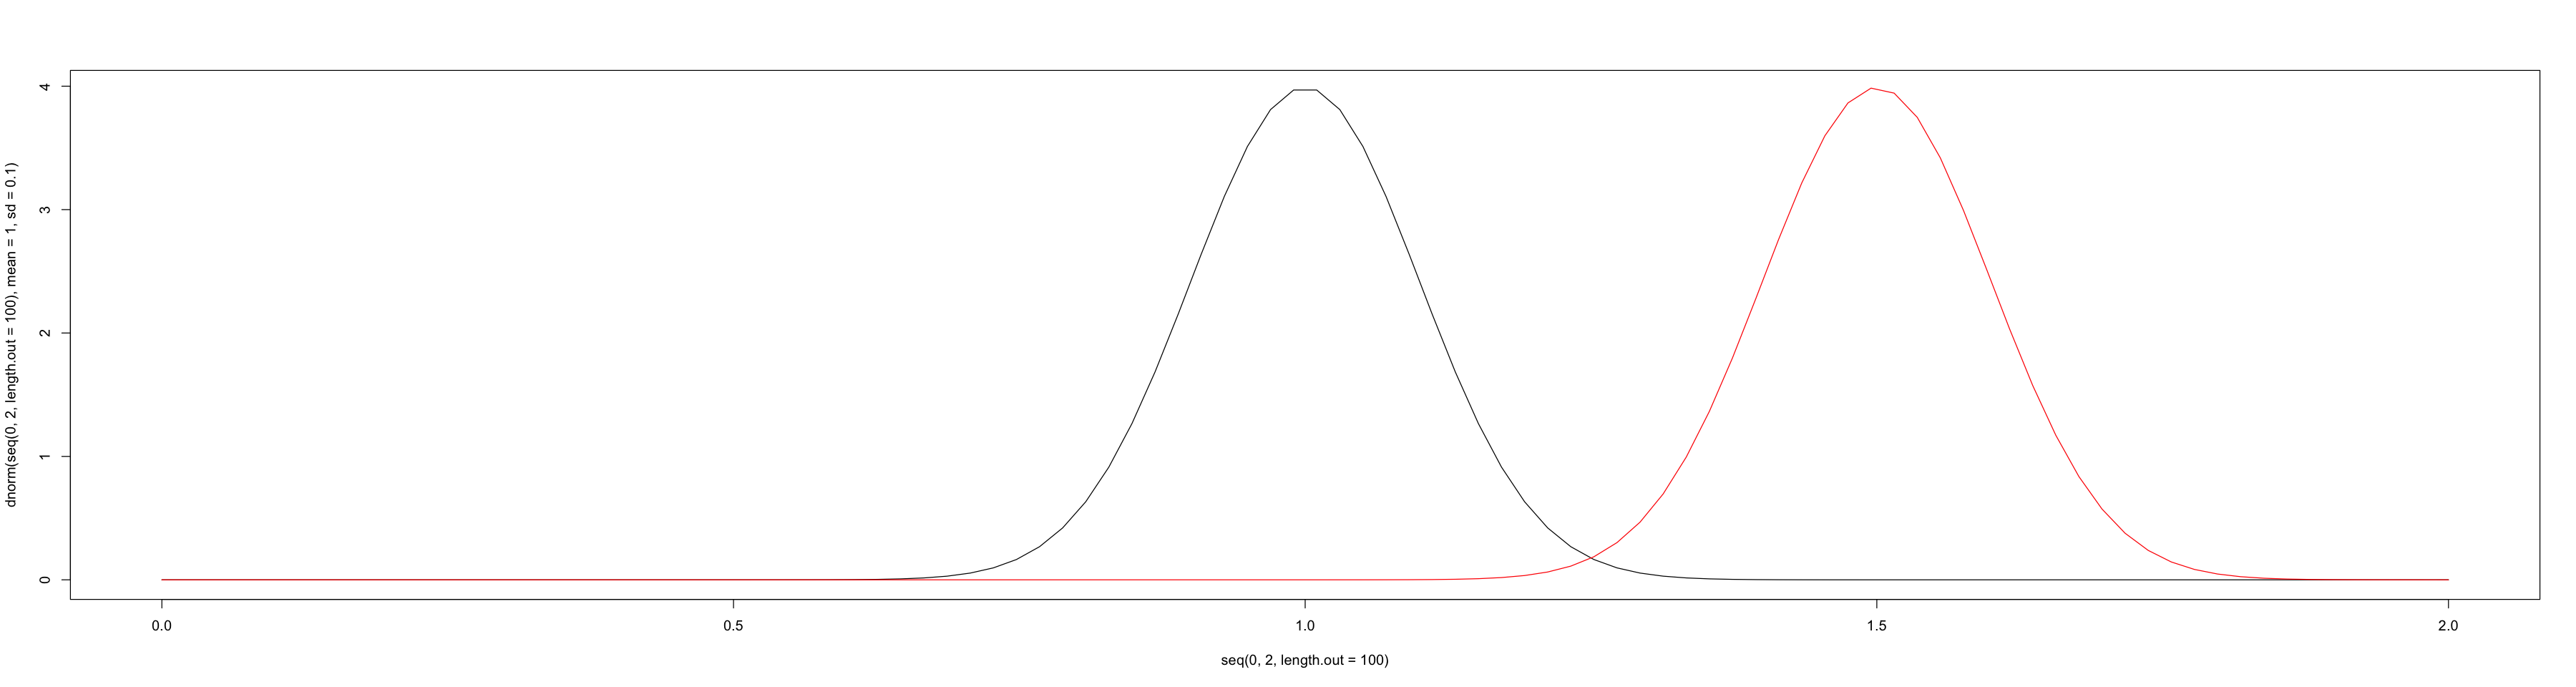

In [301]:
plot(seq(0,2, length.out = 100),dnorm(seq(0,2, length.out = 100), mean = 1, sd = 0.1), type = "l")
lines(seq(0,2, length.out = 100),dnorm(seq(0,2, length.out = 100), mean = 1.1, sd = 0.1), col = "red")

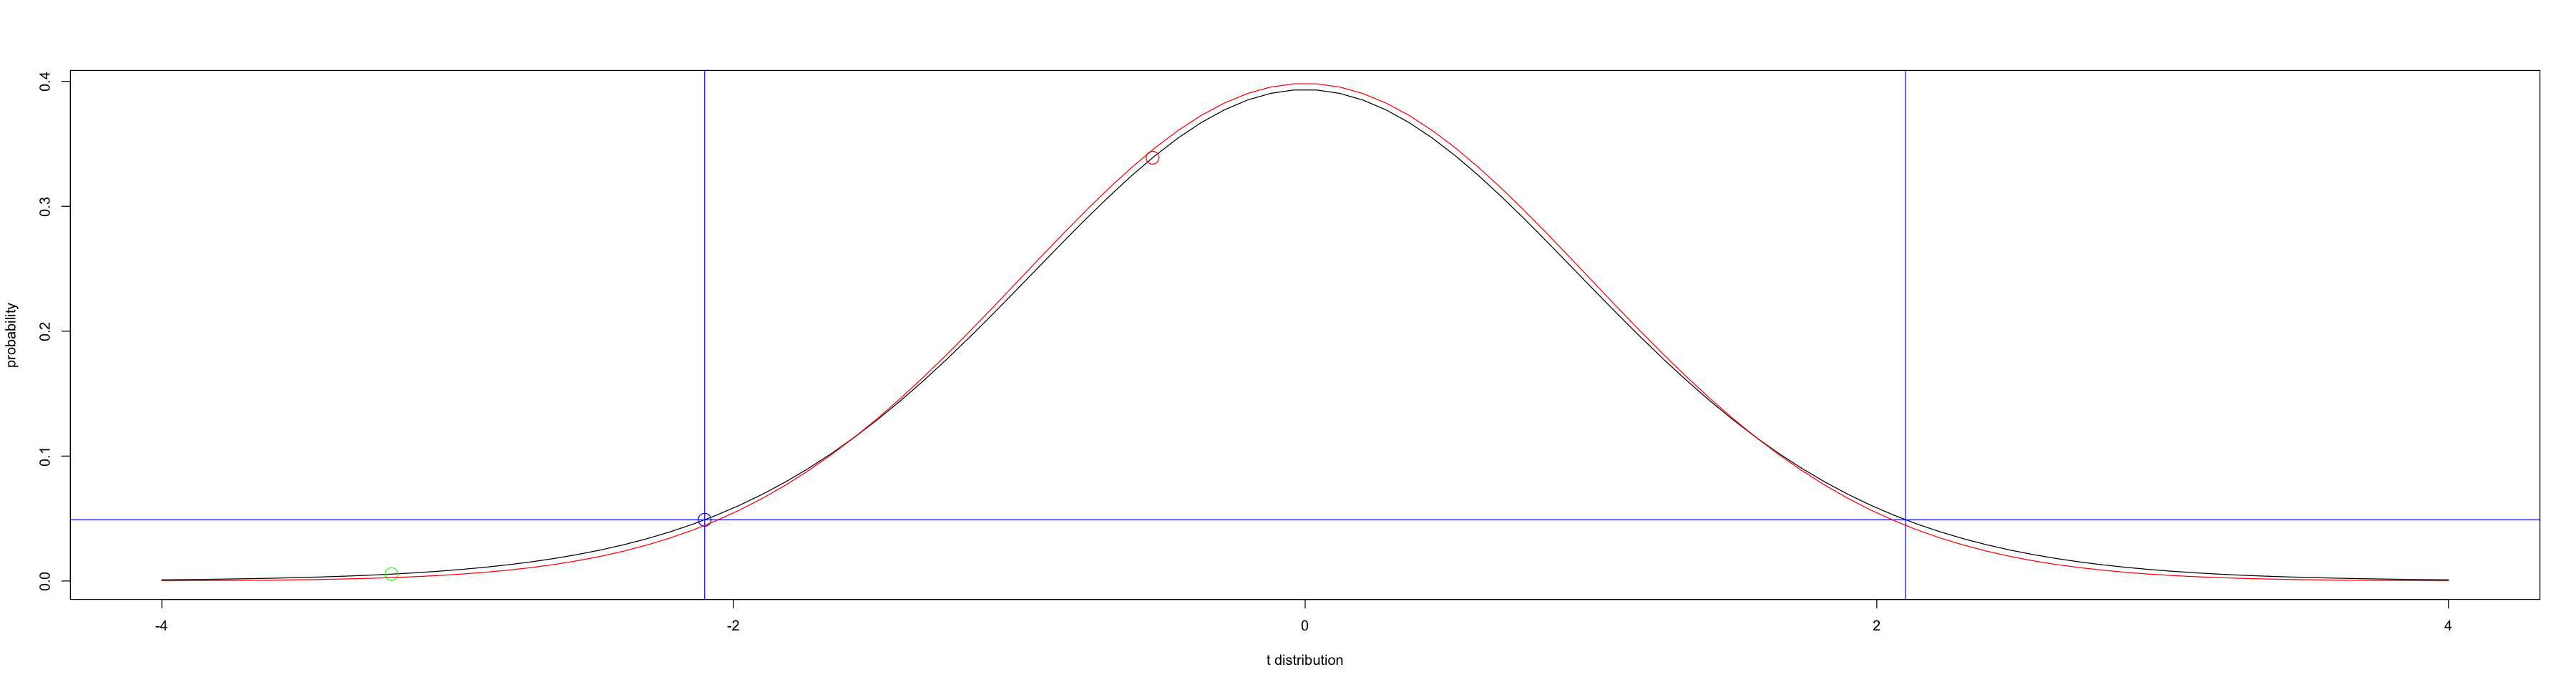

In [370]:
plot(seq(-4, 4, length.out = 100), dt(seq(-4, 4, length.out = 100), 18), type = "l", 
    xlab = "t distribution", ylab = "probability")
abline(v = qt(0.025, df = 18), col = "blue")
abline(v = qt(1 - 0.025, df = 18), col = "blue")
abline(h = dt(qt(0.025, df = 18), df = 18), col = "blue")
x <- qt(0.025, df = 18)
y <- dt(x, df = 18)
points(x, y, col = "blue", cex = 2)
x <- qt(0.0025, df = 18)
y <- dt(x, df = 18)
points(x, y, col = "green", cex = 2)
x <- qt(0.3, df = 18)
y <- dt(x, df = 18)
points(x, y, col = "red", cex = 2)
lines(seq(-4, 4, length.out = 100), dt(seq(-4, 4, length.out = 100), 180), col = "red")

In [806]:
x <- rnorm(10, mean = 1, sd = 0.1)
y <- rnorm(10, mean = 1.05, sd = 0.1)
t.test(x, y, var.equal = TRUE)
wilcox.test(x, y)


	Two Sample t-test

data:  x and y
t = -0.56504, df = 18, p-value = 0.579
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.14115478  0.08132017
sample estimates:
mean of x mean of y 
0.9818151 1.0117324 



	Wilcoxon rank sum exact test

data:  x and y
W = 43, p-value = 0.6305
alternative hypothesis: true location shift is not equal to 0


In [807]:
x <- rnorm(10, mean = 1, sd = 0.1)
y <- rnorm(10, mean = 1.1, sd = 0.1)

t <- (mean(x) - mean(y)) / sqrt((sd(x)^2/length(x)) + (sd(y)^2/length(y)))
t 
t.test(x, y, var.equal = TRUE)

[1] 0.1102835


	Two Sample t-test

data:  x and y
t = 0.11028, df = 18, p-value = 0.9134
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.09825975  0.10914714
sample estimates:
mean of x mean of y 
 1.029016  1.023572 


In [361]:
qt(0.025, df = 18)
dt(qt(0.025, df = 18), df = 18)

[1] -2.100922

[1] 0.04898458

power

[1] 0.191

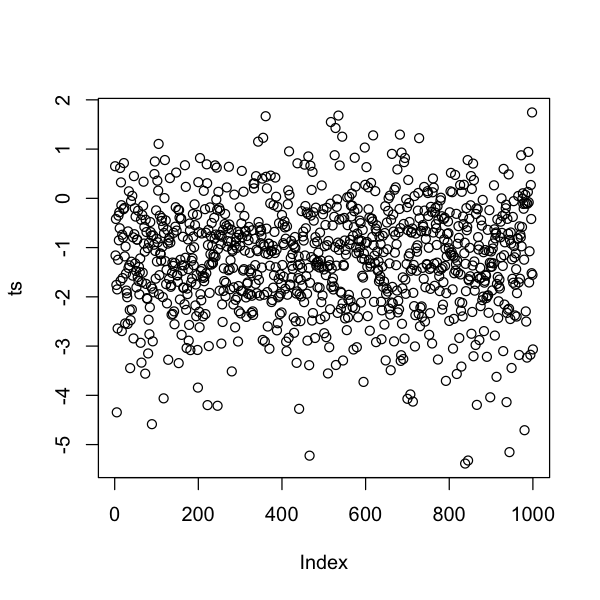

In [821]:
ts = replicate(1000,t.test(rnorm(10, mean = 1, sd = 0.1),rnorm(10, mean = 1.05, sd = 0.1))$statistic)
plot(ts)
sum(ts < qt(0.025, df = 18) | ts > qt(1 - 0.025, df = 18)) / 1000

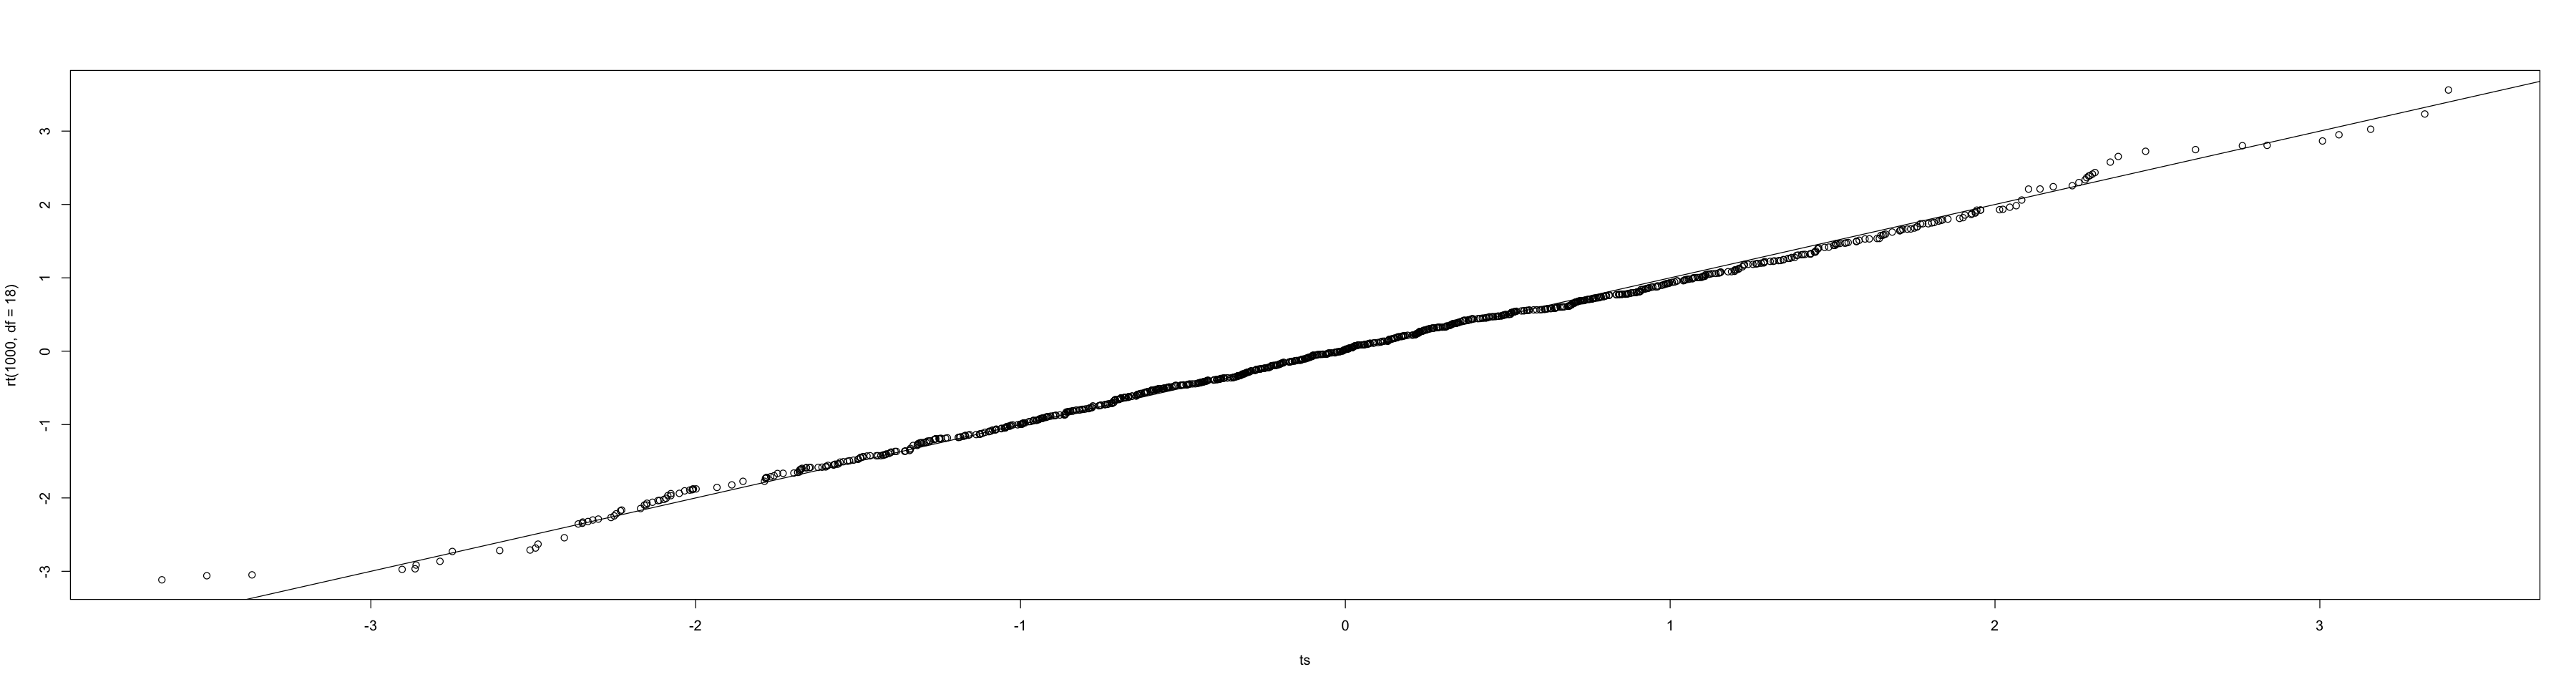

In [400]:
qqplot(ts,rt(1000,df=18))
abline(0,1)

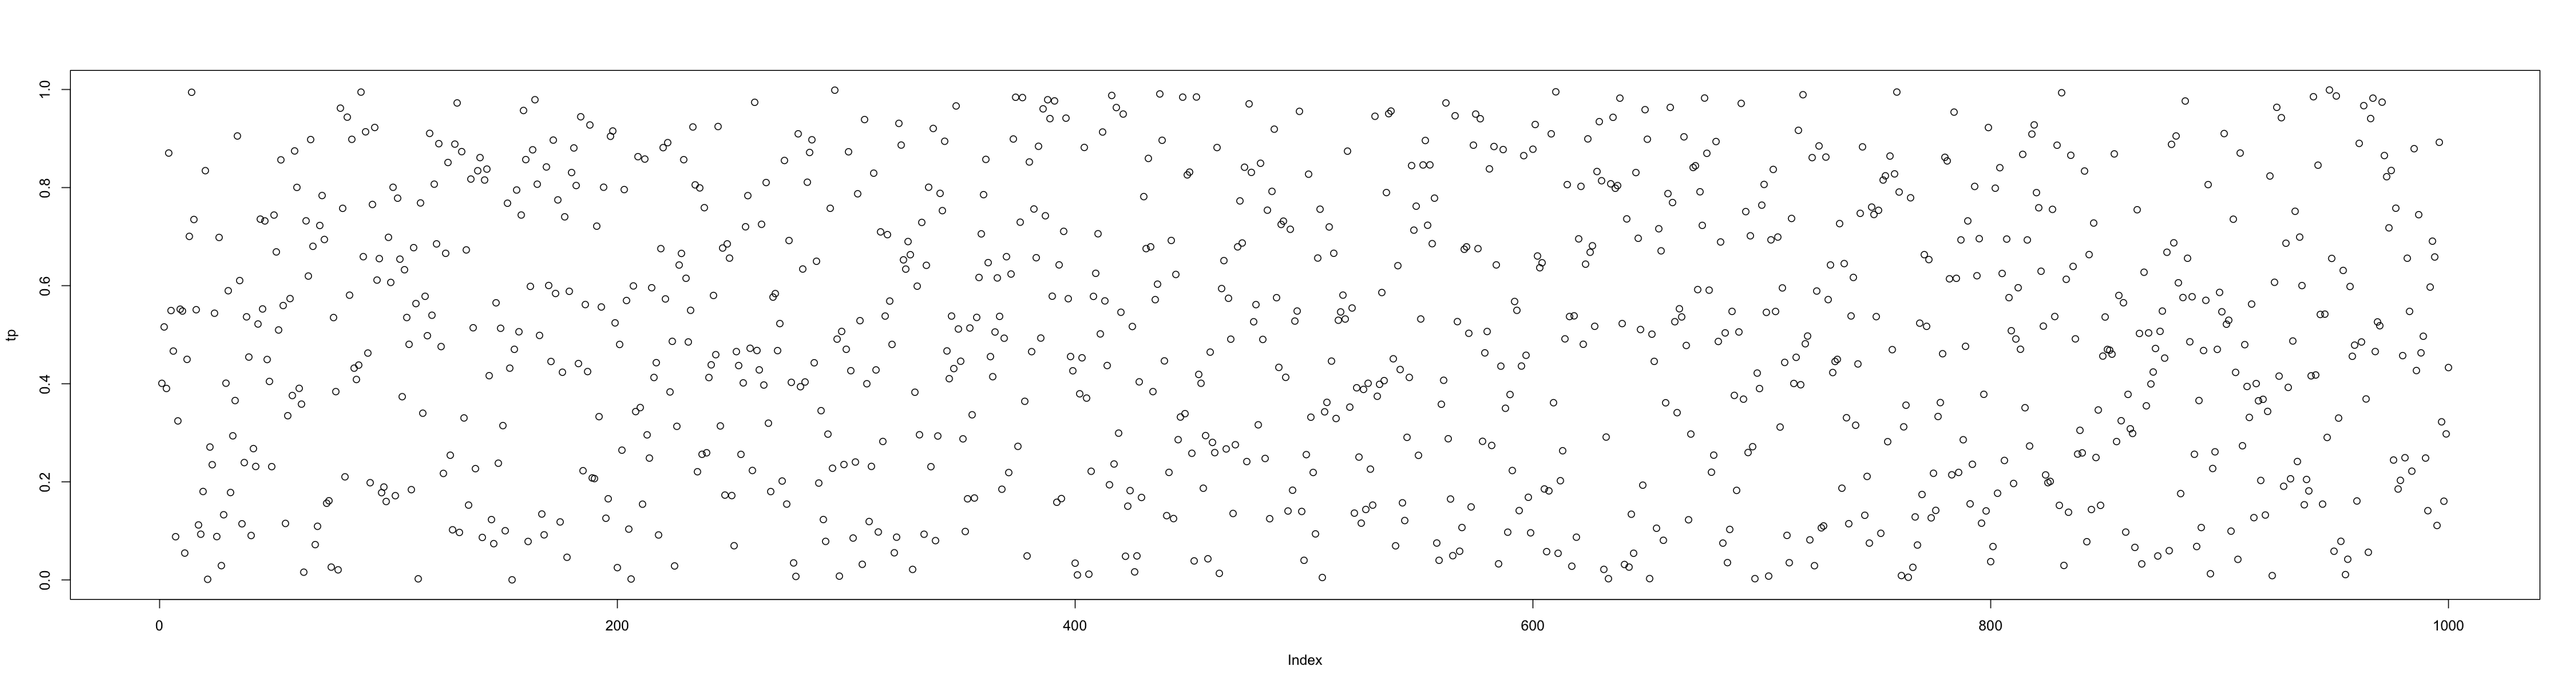

In [381]:
tp = replicate(1000,t.test(rnorm(10, mean = 1, sd = 0.1),rnorm(10, mean = 1, sd = 0.1))$p.value)
plot(tp)


In [774]:
treatment <- factor(round(runif(100),0))
levels(treatment) <-  c("treated", "not treated")
improvement <- factor(round(runif(100),0))
levels(improvement) <-  c("not improved", "improved")
df <- data.frame(treatment, improvement)

In [796]:
table(df)
table(df$improvement)

             improvement
treatment     not improved improved
  treated               29       25
  not treated           20       26


not improved     improved 
          49           51 

In [801]:
chisq.test(treatment, improvement, simulate.p.value = TRUE)


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  treatment and improvement
X-squared = 1.0393, df = NA, p-value = 0.3263


ERROR: Error in wilcox.test.default(treatment, improvement): 'x' must be numeric


In [799]:

chisq.test(c(20, 26), p = c(.5, .5), simulate.p.value = TRUE)


	Chi-squared test for given probabilities with simulated p-value (based
	on 2000 replicates)

data:  c(20, 26)
X-squared = 0.78261, df = NA, p-value = 0.4553


In [794]:
options(repr.plot.width=20, repr.plot.height=7)
# par(mfrow=c(1,3))
group <- tapply(df$treatment, df$improvement, function(x) x)
#dotchart(as.numeric(as.factor(group)))    
stem(as.numeric(group$improved))
table(group$improved)


  The decimal point is 1 digit(s) to the left of the |

  10 | 0000000000000000000000000
  12 | 
  14 | 
  16 | 
  18 | 
  20 | 00000000000000000000000000




    treated not treated 
         25          26 

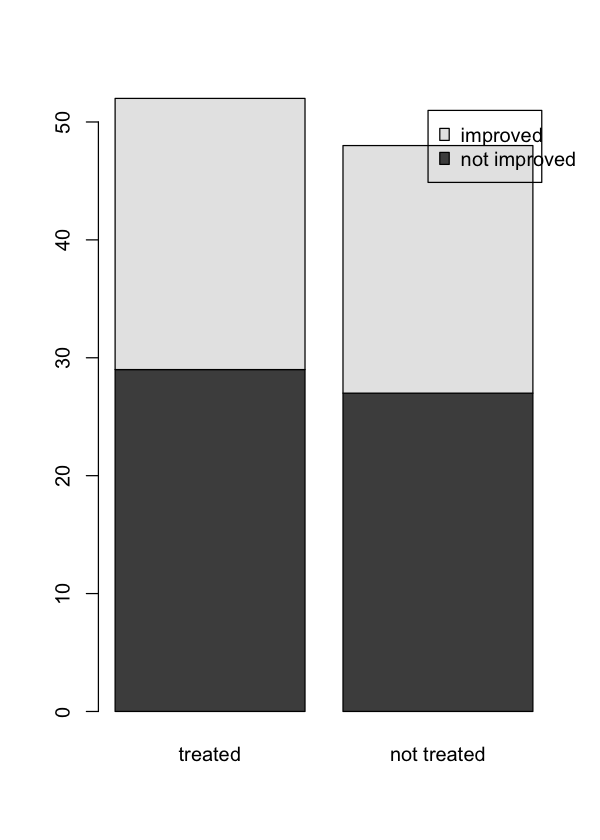

In [438]:
options(repr.plot.width=5, repr.plot.height=7)
# par(mfrow=c(1,3))
barplot(t(table(df)), width = 1, legend.text = TRUE)

comparing obtained proportion against expected proportions. Flowers collected from a color, agains the expected proportions for the colors

In [482]:
chisq.test(c(21, 40), p = c(0.5, 0.5))


	Chi-squared test for given probabilities

data:  c(21, 40)
X-squared = 5.918, df = 1, p-value = 0.01499



	Chi-squared test for given probabilities with simulated p-value (based
	on 2000 replicates)

data:  d1$counts
X-squared = 15.36, df = NA, p-value = 0.2344


Warning message in chisq.test(d1$counts, p = null.probs, rescale.p = TRUE):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  d1$counts
X-squared = 15.36, df = 12, p-value = 0.2223


[1] 10.85081

Warning message in chisq.test(d1$counts/sum(d1$counts), p = null.probs, rescale.p = TRUE):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities with simulated p-value (based
	on 2000 replicates)

data:  d1$counts
X-squared = 137.24, df = NA, p-value = 0.2729



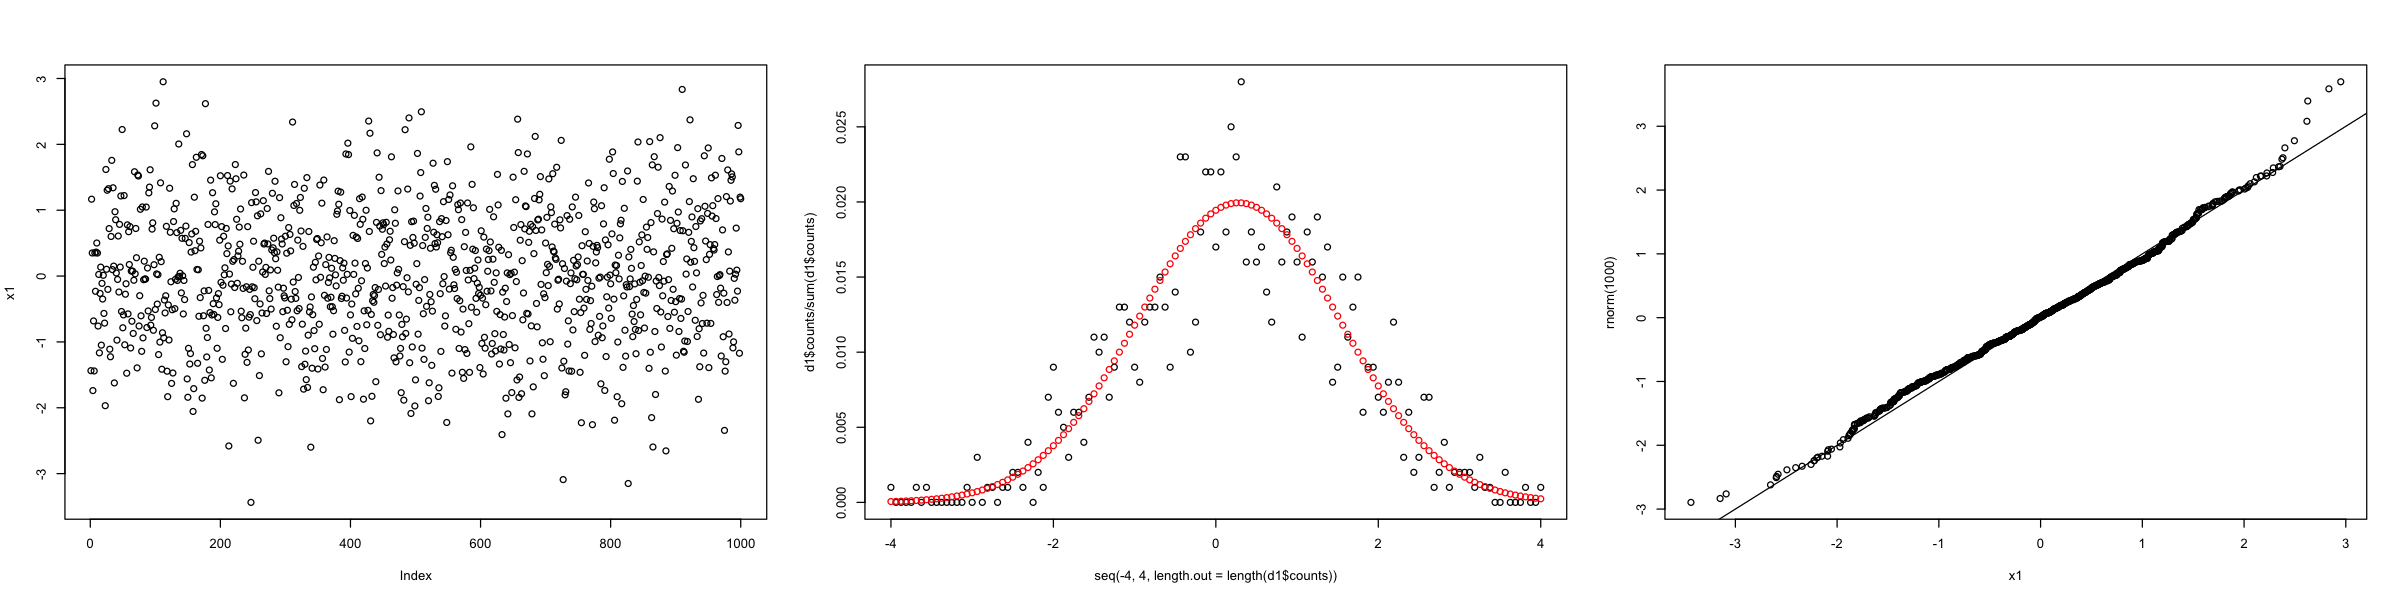

In [704]:
options(repr.plot.width=20, repr.plot.height=5)
par(mfrow=c(1,3))

x1 <- rnorm(1000)
d1 <- hist(x1, breaks = 200, right=FALSE, plot = FALSE)

library("zoo")
breaks_cdf <- pnorm(d1$breaks)
null.probs <- rollapply(breaks_cdf, 2, function(x) x[2]-x[1])
# plot(null.probs)
                        
test <- chisq.test(d1$counts, p = null.probs, rescale.p=TRUE, simulate.p.value=TRUE)
df <- chisq.test(d1$counts/sum(d1$counts), p = null.probs, rescale.p=TRUE)$parameter
print(test)
# qchisq(0.05, df = df)
# test$statistic

plot(x1)
plot(seq(-4,4, length.out = length(d1$counts)), d1$counts/sum(d1$counts))
points(seq(-4,4, length.out = length(d1$counts)), null.probs, col = "red")
qqplot(x1, rnorm(1000))
abline(a = 0, b = 1)

Warning message in chisq.test(d1$counts/sum(d1$counts), p = null.probs, rescale.p = TRUE):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities with simulated p-value (based
	on 2000 replicates)

data:  d1$counts
X-squared = 273.81, df = NA, p-value = 0.1434



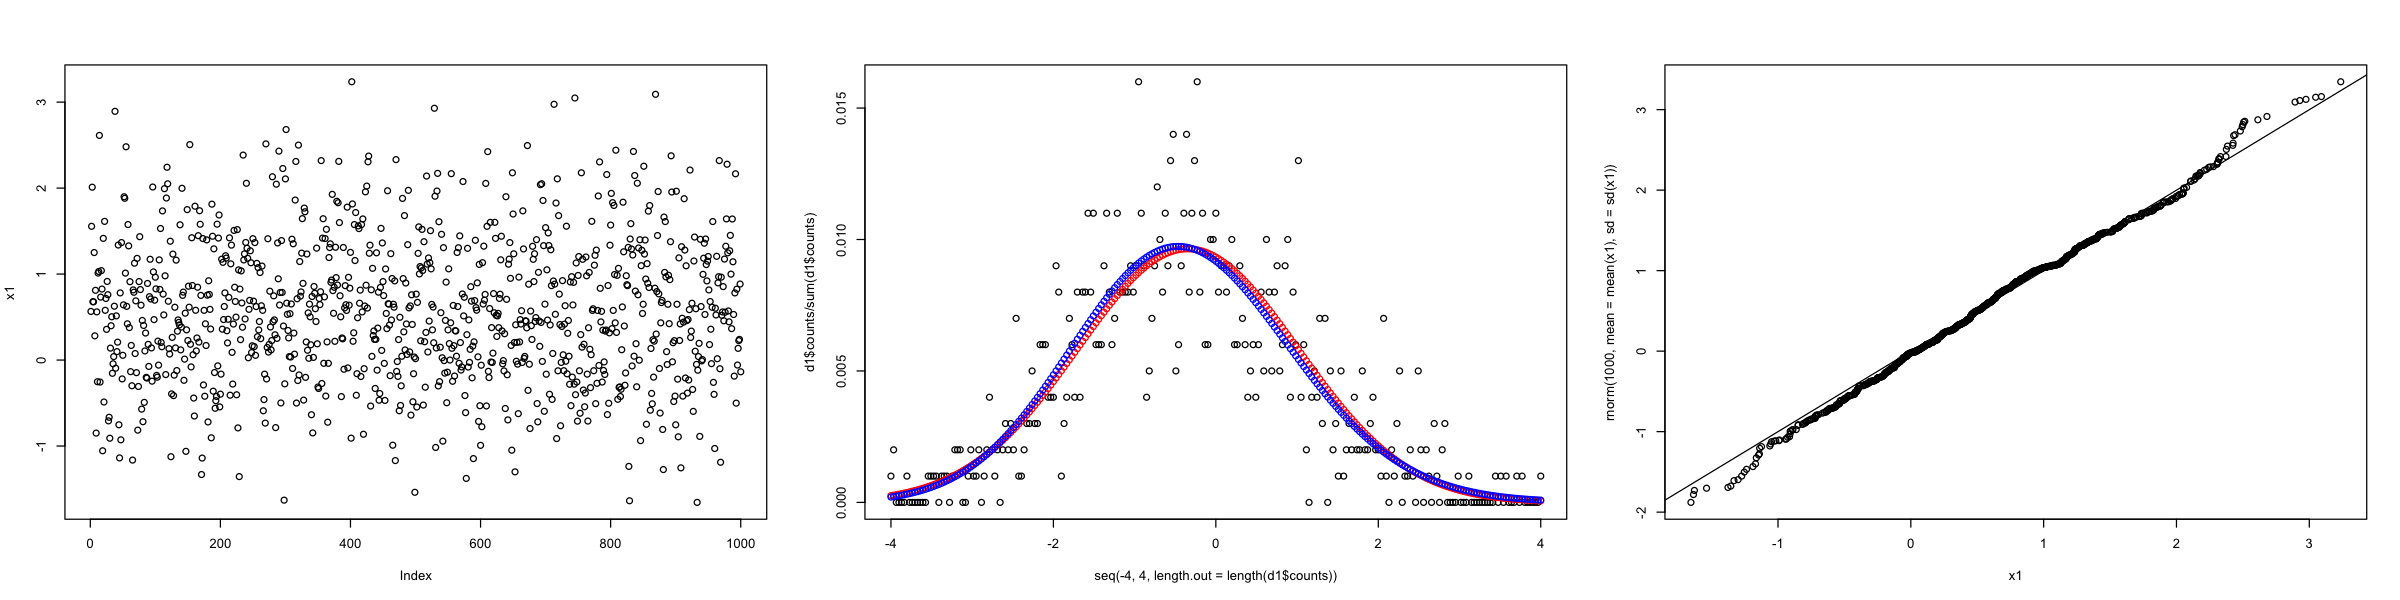

In [826]:

options(repr.plot.width=20, repr.plot.height=5)
par(mfrow=c(1,3))

library(sn)
omega = 1
alpha = 1
tau = 0
x1 = rsn(1000, omega = omega, alpha = alpha, tau = tau)
d1 <- hist(x1, breaks = 200, right=FALSE, plot = FALSE)

library("zoo")
breaks_cdf <- pnorm(d1$breaks, mean = mean(x1), sd = sd(x1))
null.probs <- rollapply(breaks_cdf, 2, function(x) x[2]-x[1])
# plot(null.probs)
                        
test <- chisq.test(d1$counts, p = null.probs, rescale.p=TRUE, simulate.p.value=TRUE)
df <- chisq.test(d1$counts/sum(d1$counts), p = null.probs, rescale.p=TRUE)$parameter
print(test)
# qchisq(0.05, df = df)
# test$statistic

breaks_cdf <- psn(d1$breaks, omega = omega, alpha = alpha, tau = tau)
ref <- rollapply(breaks_cdf, 2, function(x) x[2]-x[1])

plot(x1)
plot(seq(-4,4, length.out = length(d1$counts)), d1$counts/sum(d1$counts))
points(seq(-4,4, length.out = length(d1$counts)), null.probs, col = "red")
points(seq(-4,4, length.out = length(d1$counts)), ref, col = "blue")
qqplot(x1, rnorm(1000, mean = mean(x1), sd = sd(x1)))
abline(a = 0, b = 1)

[1] 0.1236434

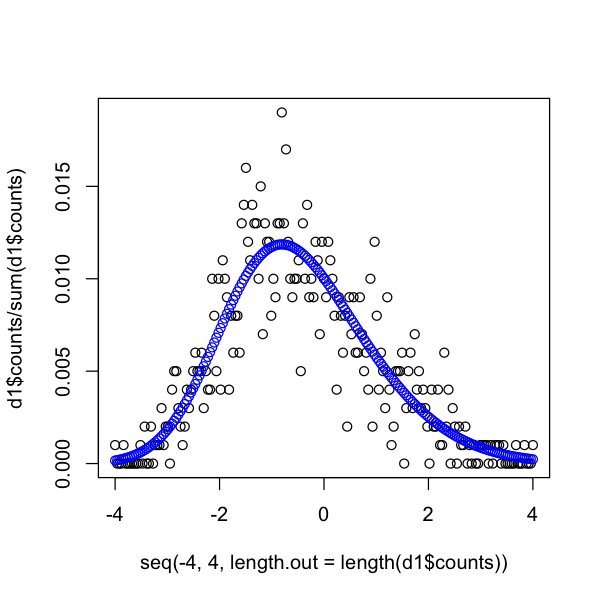

In [813]:
options(repr.plot.width=5, repr.plot.height=5)
plot(seq(-4,4, length.out = length(d1$counts)), d1$counts/sum(d1$counts))
points(seq(-4,4, length.out = length(d1$counts)), ref, col = "blue")
sum(ref[1:])


	One-sample Kolmogorov-Smirnov test

data:  data1
D = 0.076376, p-value = 0.6041
alternative hypothesis: two-sided



	One-sample Kolmogorov-Smirnov test

data:  data2
D = 0.083822, p-value = 0.4834
alternative hypothesis: two-sided



	Two-sample Kolmogorov-Smirnov test

data:  data1 and data2
D = 0.08, p-value = 0.9062
alternative hypothesis: two-sided



	Shapiro-Wilk normality test

data:  data1
W = 0.98505, p-value = 0.3203



	Shapiro-Wilk normality test

data:  data2
W = 0.9934, p-value = 0.9112


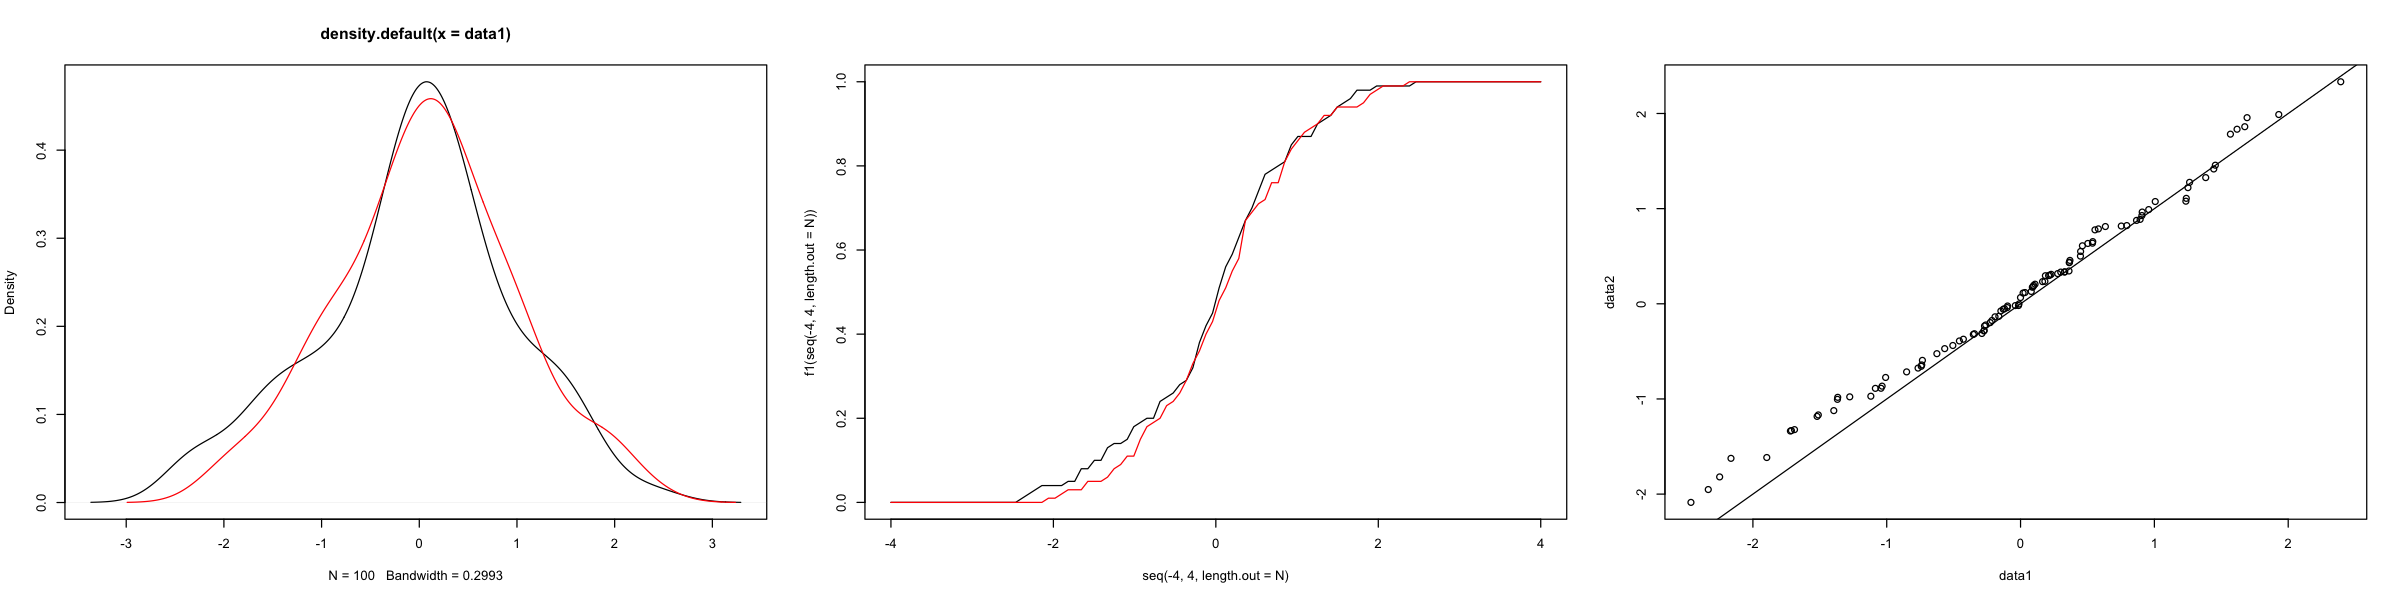

In [723]:
options(repr.plot.width=20, repr.plot.height=5)
par(mfrow=c(1,3))
N <- 100
data1 <- rnorm(N, mean = 0, sd = 1)
data2 <- rnorm(N, mean = 0, sd = 1)
#data2 <- runif(c(140:200), max = 170, min = 150)
plot(density(data1), type = "l")
lines(density(data2), col = "red")

f1 <- ecdf(data1)
f2 <- ecdf(data2)
plot(seq(-4,4, length.out = N), f1(seq(-4,4, length.out = N)), type = "l")
lines(seq(-4,4, length.out = N), f2(seq(-4,4, length.out = N)), col = "red")
qqplot(data1, data2)
abline(a = 0, b = 1)

ks.test(data1, "pnorm")
ks.test(data2, "pnorm")
ks.test(data1, data2)
shapiro.test(data1)
shapiro.test(data2)

the p-value is larger than 0.05 so we cannot reject the null hypothesis, which means that the distributions are basically normal

## association measurements

We use the Choleski decomposition to produce a serie of vector with known correlation. It starts from a covariance matrix R that is then decomposed and use to multiply a random vector. This strategy is used in Monte Carlo simulations.

https://en.wikipedia.org/wiki/Cholesky_decomposition
https://www.r-bloggers.com/2013/03/simulating-random-multivariate-correlated-data-continuous-variables/

response  predictor1 predictor2
response   1.0000000 0.8023639  0.2049004 
predictor1 0.8023639 1.0000000  0.7005875 
predictor2 0.2049004 0.7005875  1.0000000

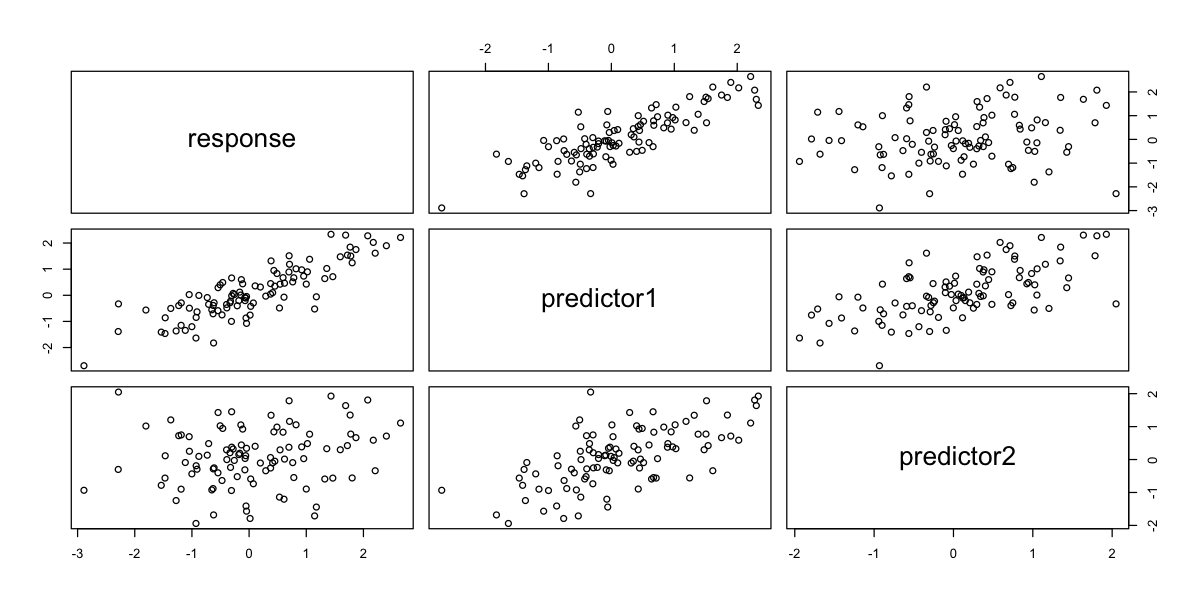

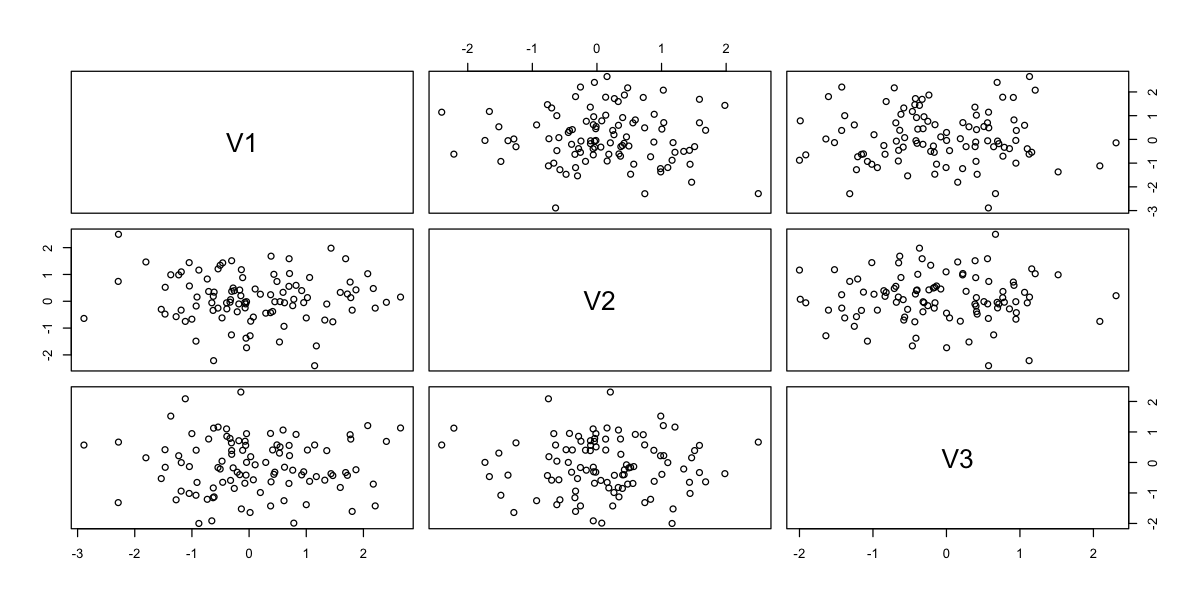

In [939]:
R = matrix(cbind(1,.80,.2,  .80,1,.7,  .2,.7,1),nrow=3)
U = t(chol(R))
nvars = dim(U)[1]
numobs = 10000
set.seed(1)
random.normal = matrix(rnorm(nvars*numobs,0,1), nrow=nvars, ncol=numobs);
X = U %*% random.normal
newX = t(X)
raw = as.data.frame(newX)
orig.raw = as.data.frame(t(random.normal))
names(raw) = c("response","predictor1","predictor2")
cor(raw)
plot(head(raw, 100))
plot(head(orig.raw,100))

In [928]:
idx <- sample(10000, 300)
mod <- lm(response ~ predictor1, raw[idx,])

[1] 0.7837947

[1] 0.791655

[1] 0.7029597

[1] 0.7837947

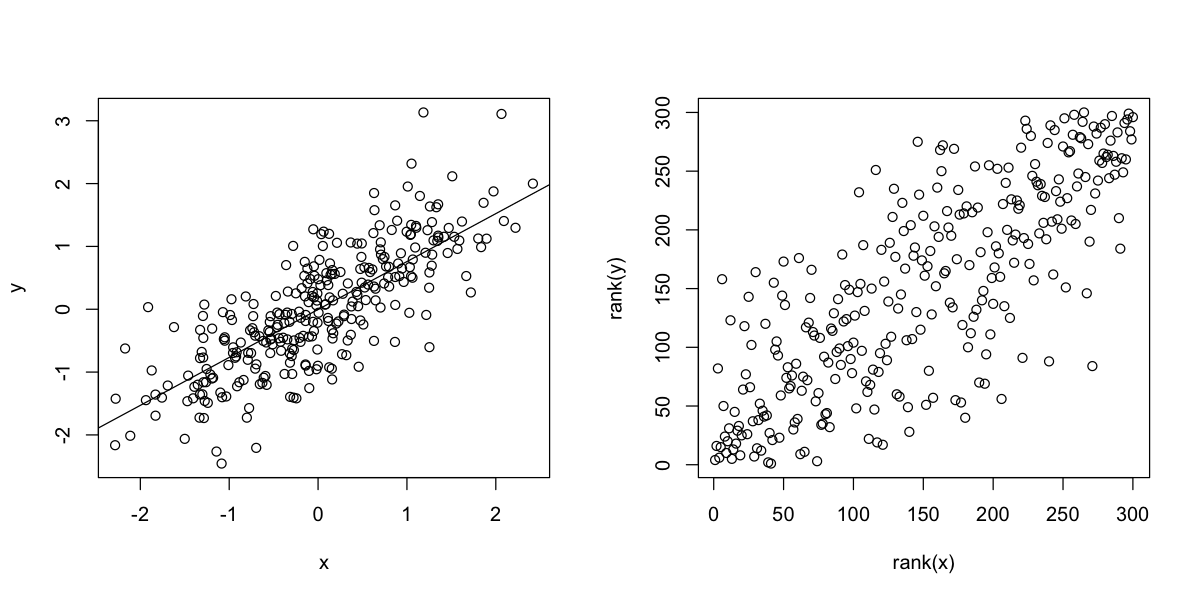

In [930]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))

x <- orig.raw[idx,1]
y <- orig.raw[idx,2]
cor(x, y)
cor(x, y, method = "spearman")
cov(x, y)
cov(x, y) / (sd(x) * sd(y))
plot(x, -y)
abline(a = mod$coefficients[1], b = mod$coefficients[2])
plot(rank(x), rank(y))

[1] 0.7586396

[1] 0.7882679

predictor1 
 0.8061384

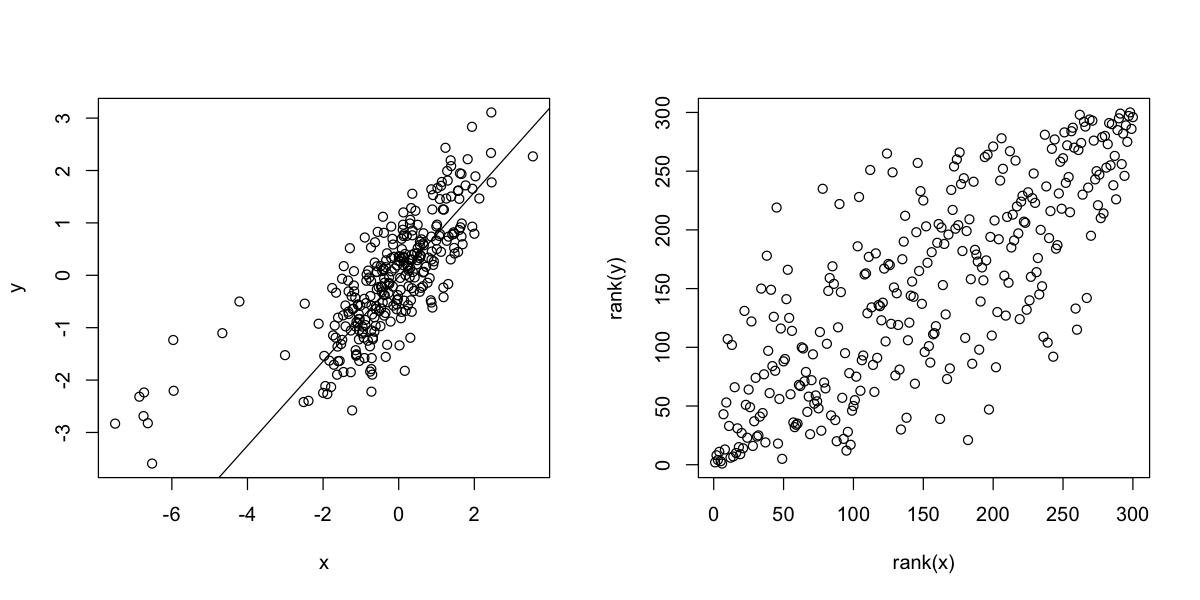

In [926]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))

idx <- sample(300, 10)
x[idx] <- x[idx] - 6
y[idx] <- y[idx] - 2
cor(x, y)
cor(x, y, method = "spearman")
mod$coefficients[2]
plot(x, y)
abline(a = mod$coefficients[1], b = mod$coefficients[2])
plot(rank(x), rank(y))

[[1]]
2 x 2 Matrix of class "dsyMatrix"
           [,1]       [,2]
[1,]  1.0000000 -0.7534106
[2,] -0.7534106  1.0000000

[[2]]
2 x 2 Matrix of class "dsyMatrix"
          [,1]      [,2]
[1,] 1.0000000 0.6592343
[2,] 0.6592343 1.0000000


[,1]       [,2]      
[1,]  1.0000000 -0.6794867
[2,] -0.6794867  1.0000000

   
     1  2  3
  1  0  4  7
  2  0 16  3
  3 41 29  0


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  m
X-squared = 38.511, df = NA, p-value = 1


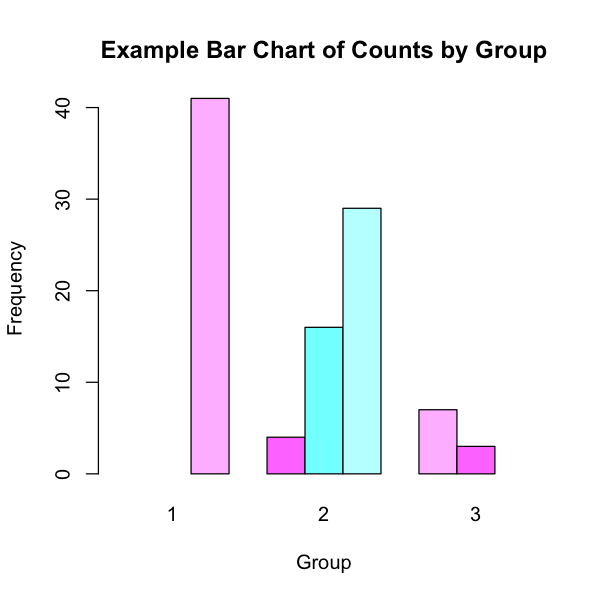

In [916]:
library(GenOrd)
#set.seed(1)
# Sets the marginals.
# The values are cumulative so for the first variable the first marginal will be .1, the second is .2, the third is .3, and the fourth is .4
marginal <- list(c(0.1,0.3),c(0.4,0.9))
# Checks the lower and upper bounds of the correlation coefficients.
corrcheck(marginal)
# Sets the correlation coefficients
R <- matrix(c(1,-0.6,-0.6,1),2,2) # Correlation matrix
n <- 100
##Selects and ordinal sample with given correlation R and given marginals.
m <- ordsample(n, marginal, R)
##compare it with the pre-defined R
cor(m)
table(m[,1],m[,2])
chisq.test(m, simulate.p.value = TRUE)
gbar <- tapply(m[,1], list(m[,1], m[,2]), length)
par(mfrow=c(1,1))
barplot(gbar, beside=T, col=cm.colors(4), main="Example Bar Chart of Counts by Group",xlab="Group",ylab="Frequency")

In [1030]:
R = matrix(cbind(1,.80,.3,.4,  .80,1,.1,.2,  .3,.1,1,.22 ,  .4,.2,.22,1),nrow=4)
R

[,1] [,2] [,3] [,4]
[1,] 1.0  0.8  0.30 0.40
[2,] 0.8  1.0  0.10 0.20
[3,] 0.3  0.1  1.00 0.22
[4,] 0.4  0.2  0.22 1.00

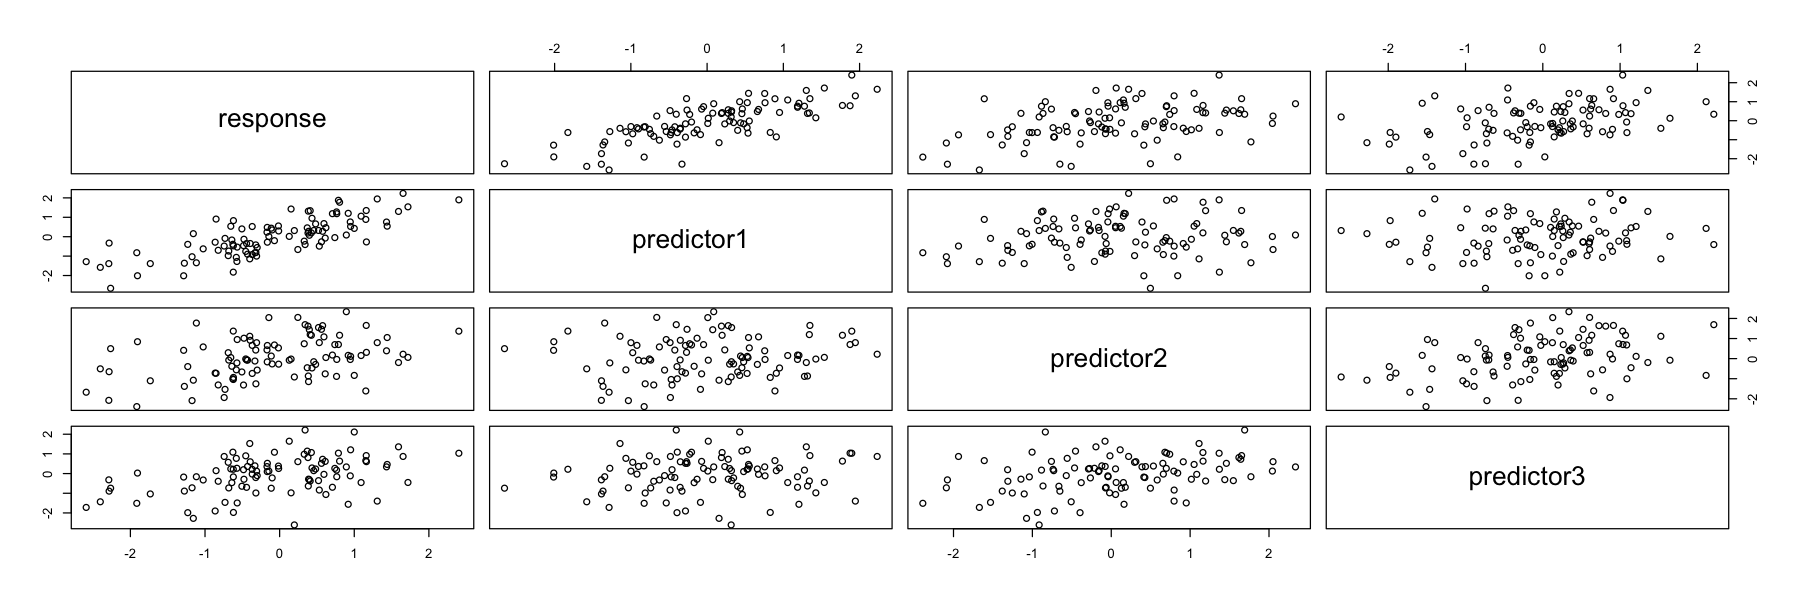

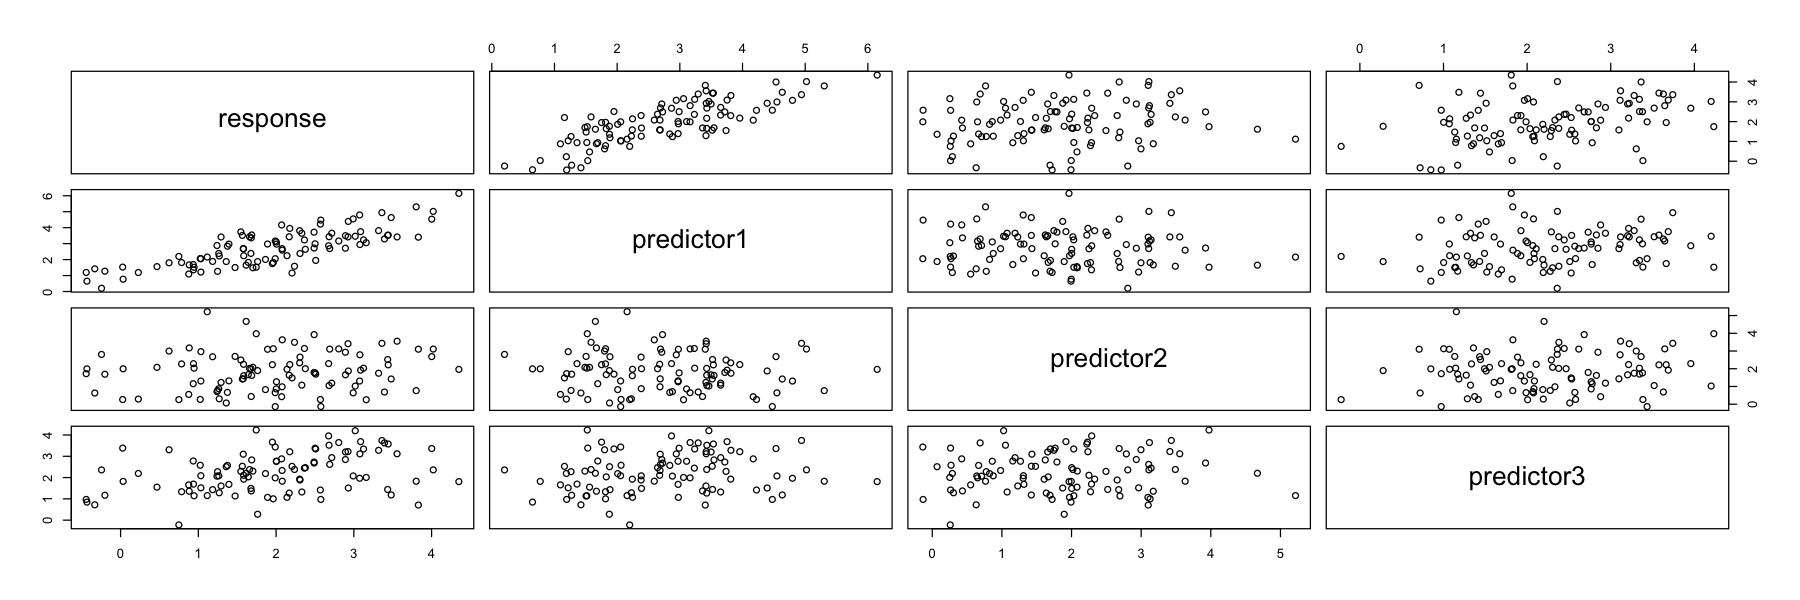

In [1031]:

U = t(chol(R))
nvars = dim(U)[1]
numobs = 100
set.seed(1)
random.normal = matrix(rnorm(nvars*numobs,0,1), nrow=nvars, ncol=numobs);
X = U %*% random.normal
newX = t(X)
raw = as.data.frame(newX)
orig.raw = as.data.frame(t(random.normal))
names(raw) = c("response","predictor1","predictor2","predictor3")
plot(raw)
A <- raw

random.normal = matrix(rnorm(nvars*numobs,2,1), nrow=nvars, ncol=numobs);
X = U %*% random.normal
newX = t(X)
raw = as.data.frame(newX)
orig.raw = as.data.frame(t(random.normal))
names(raw) = c("response","predictor1","predictor2","predictor3")
plot(raw)
B <- raw

In [1032]:
data <- rbind(A, B)
group <- rep(c(1, 2), each = 100)

In [1033]:
mod <- prcomp(data)

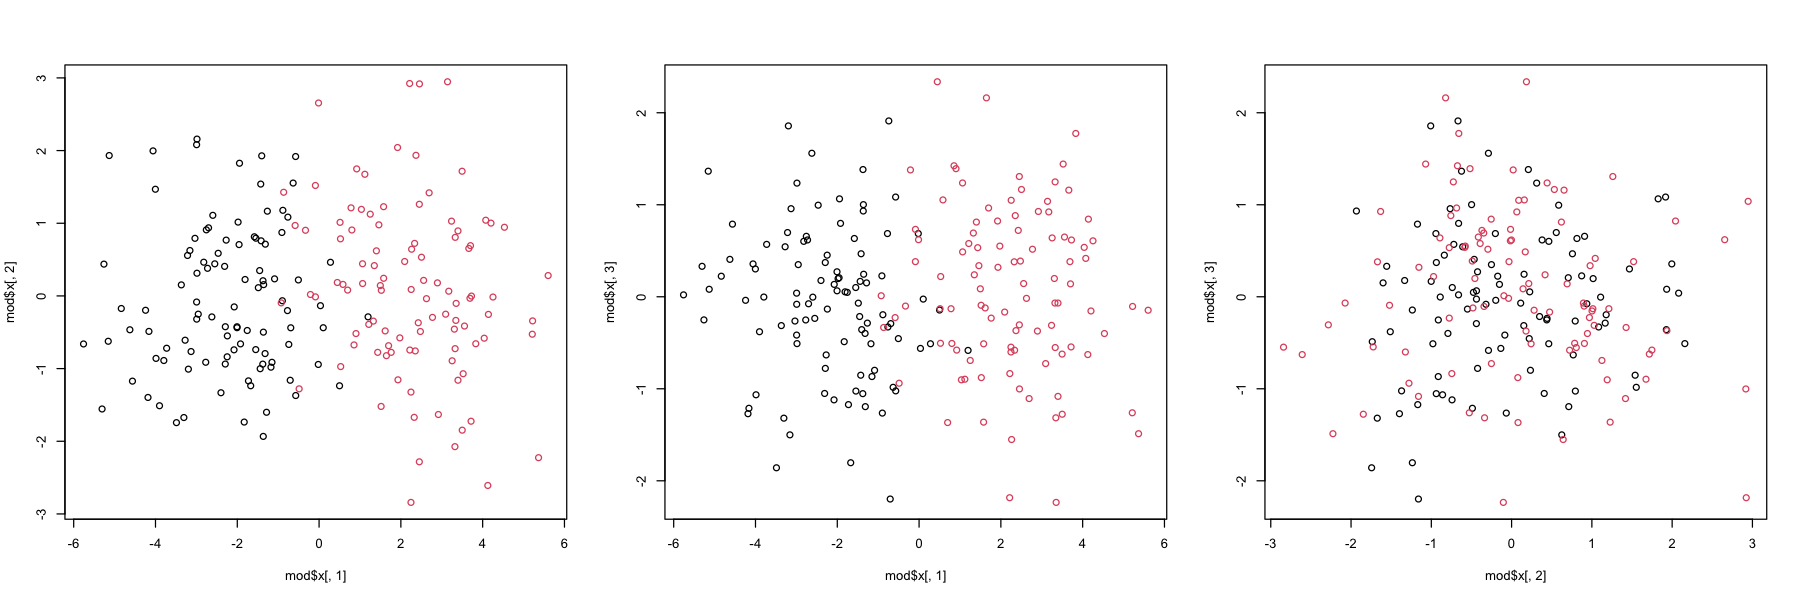

In [1034]:
options(repr.plot.width=15, repr.plot.height=5)
par(mfrow=c(1,3))
plot(mod$x[,1], mod$x[,2], col = as.factor(group))
plot(mod$x[,1], mod$x[,3], col = as.factor(group))
plot(mod$x[,2], mod$x[,3], col = as.factor(group))

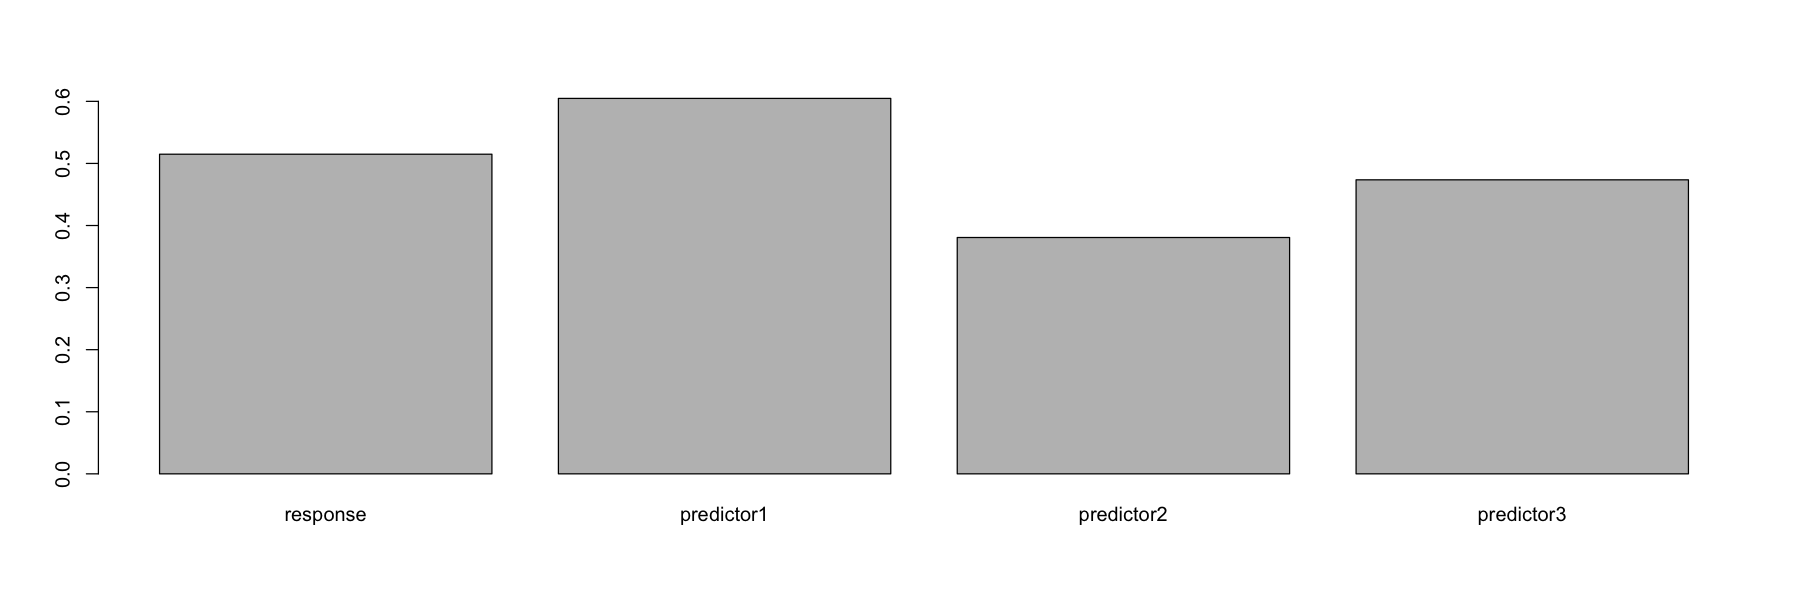

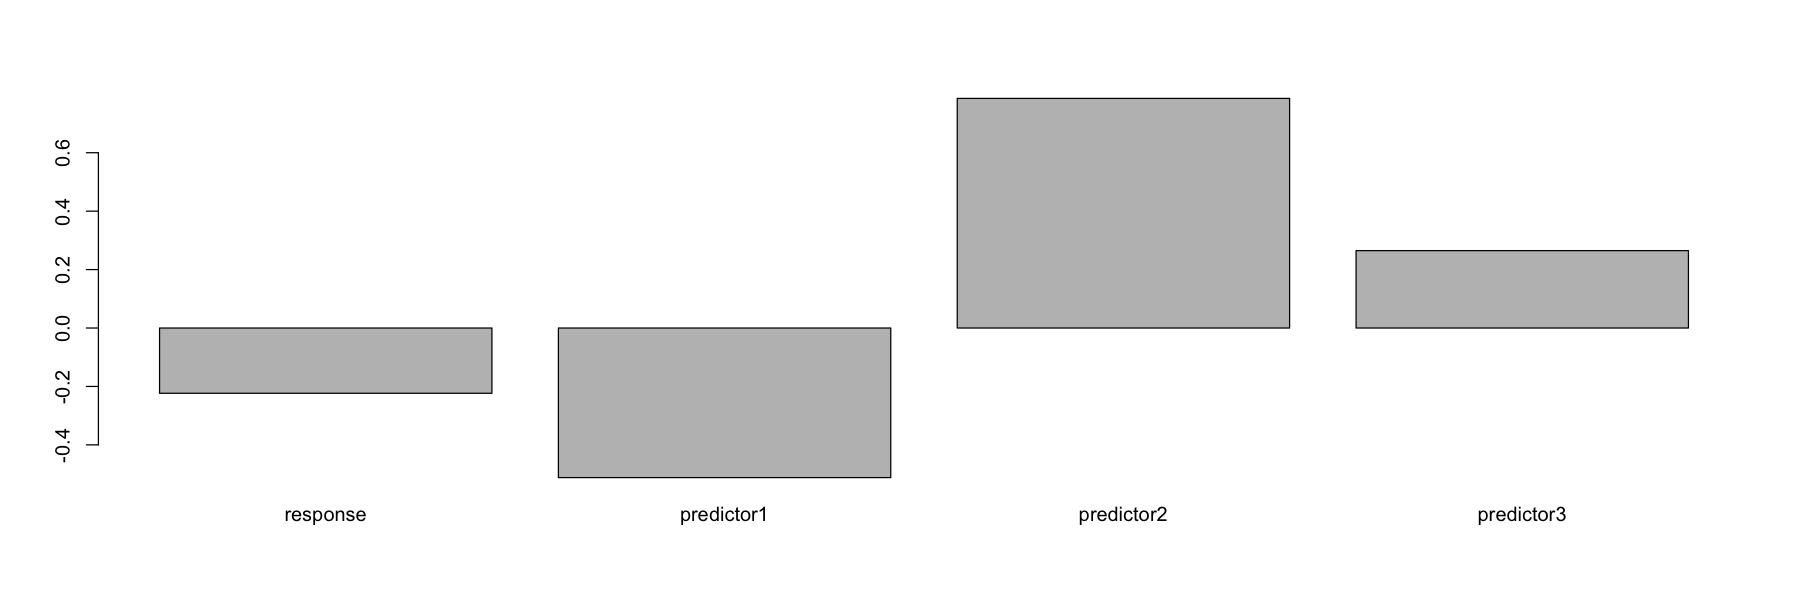

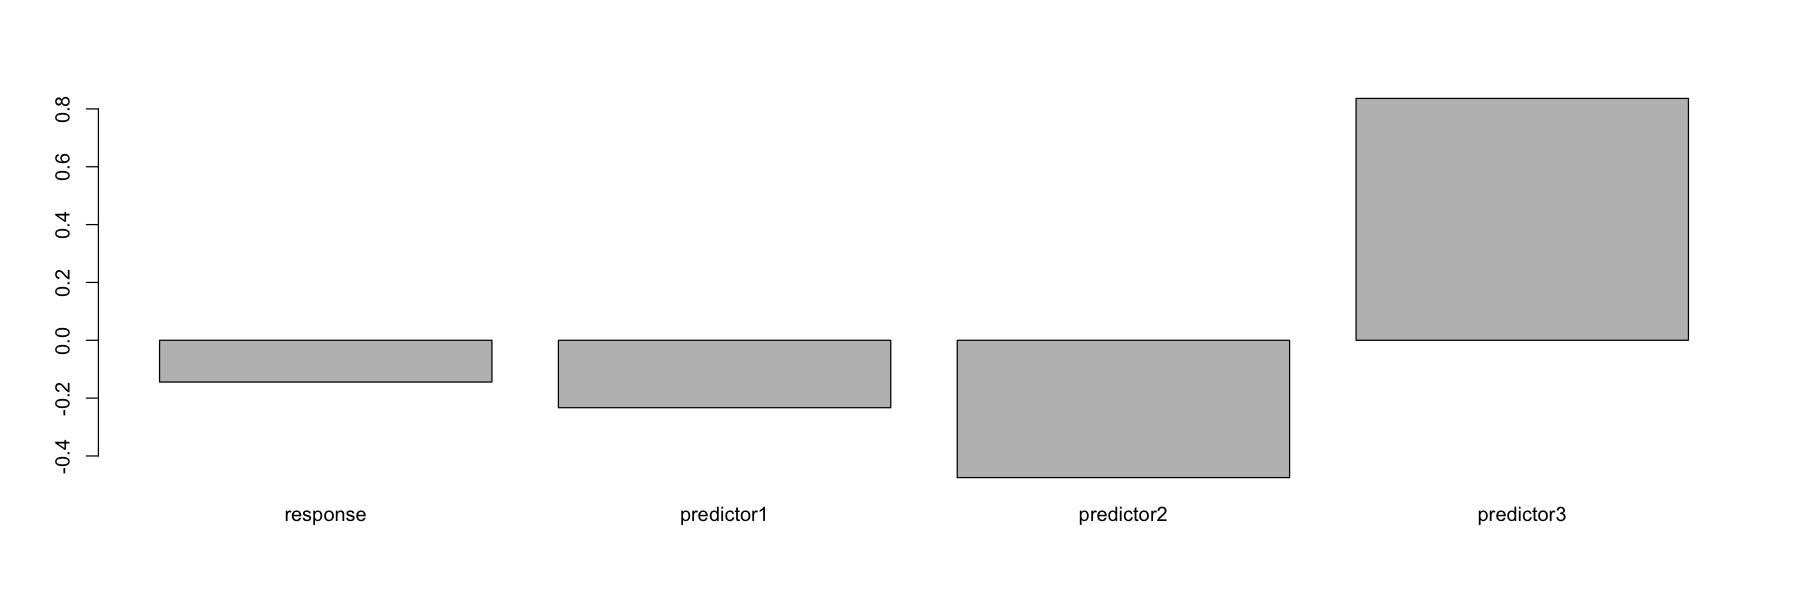

In [1035]:
barplot(mod$rotation[,1])
barplot(mod$rotation[,2])
barplot(mod$rotation[,3])

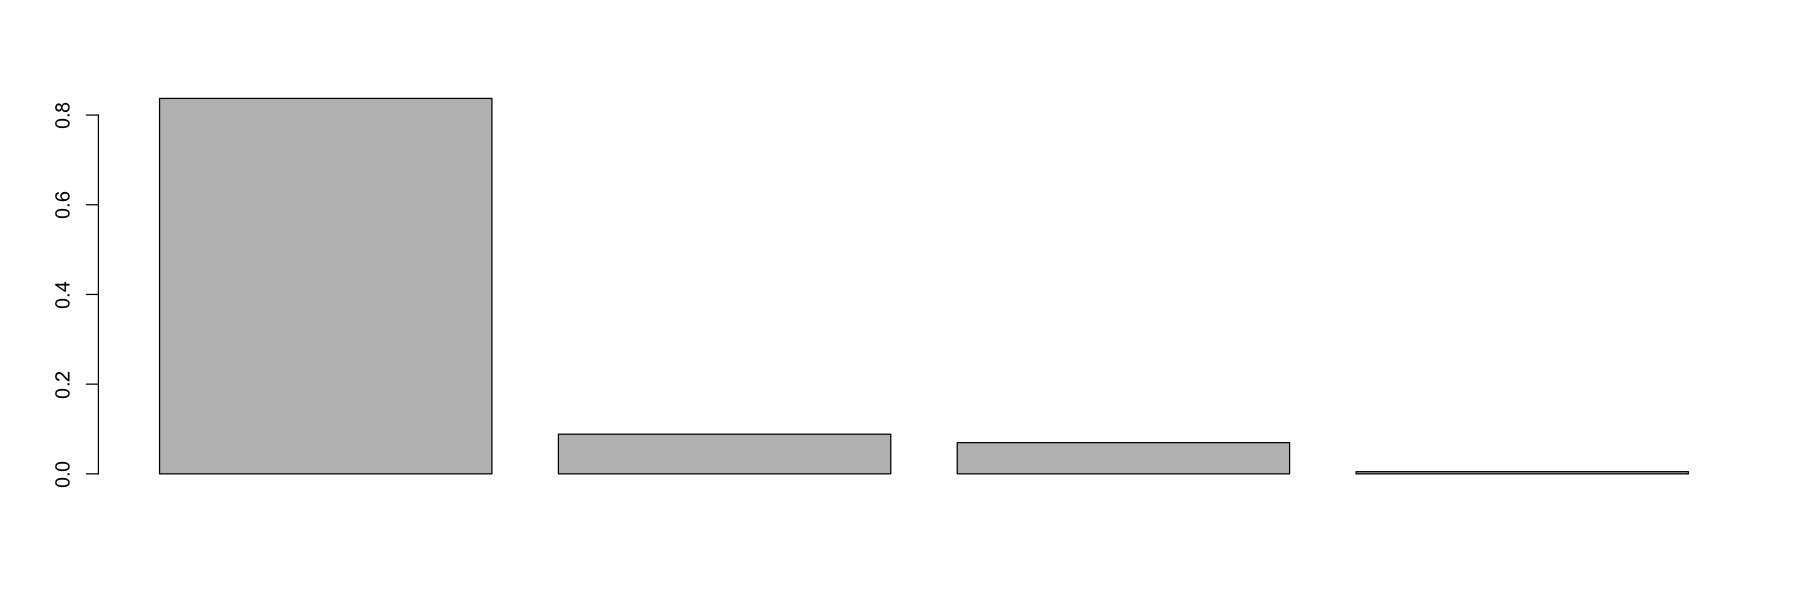

In [1019]:
var_explained <- mod$sdev^2/sum(mod$sdev^2)
barplot(var_explained)